In [50]:
# Temporarily suppress FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [51]:
import numpy as np
import pandas as pd
import scanpy as sc

In [52]:
import scirpy as ir
from matplotlib import pyplot as plt, cm as mpl_cm
from cycler import cycler

sc.set_figure_params(figsize=(4, 4))
sc.settings.verbosity = 2  # verbosity: errors (0), warnings (1), info (2), hints (3)

In [53]:
sc.logging.print_header()

scanpy==1.10.0.dev26+gd7e13025 anndata==0.8.0 umap==0.5.3 numpy==1.21.6 scipy==1.8.0 pandas==1.4.2 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.9.8 louvain==0.7.1 pynndescent==0.5.6


### Import PTZ-MD01_004

In [54]:
MD01_004_tumor_TCR =ir.io.read_10x_vdj("/home/lugli/spuccio/Projects/CNR_SP01/scRNAseq/GSE176021_RAW/MD01-004/MD01-004_tumor_1.vdj/filtered_contig_annotations.csv")
MD01_004_tumor = sc.read_10x_mtx("/home/lugli/spuccio/Projects/CNR_SP01/scRNAseq/GSE176021_RAW/MD01-004/MD01-004_tumor_1/")
MD01_004_LN_1 = sc.read_10x_mtx("/home/lugli/spuccio/Projects/CNR_SP01/scRNAseq/GSE176021_RAW/MD01-004/MD01-004_LN_1/")
MD01_004_LN_1_TCR = ir.io.read_10x_vdj("/home/lugli/spuccio/Projects/CNR_SP01/scRNAseq/GSE176021_RAW/MD01-004/MD01-004_LN_1.vdj/filtered_contig_annotations.csv")
MD01_004_LN_2 = sc.read_10x_mtx("/home/lugli/spuccio/Projects/CNR_SP01/scRNAseq/GSE176021_RAW/MD01-004/MD01-004_LN_2/")
MD01_004_LN_2_TCR = ir.io.read_10x_vdj("/home/lugli/spuccio/Projects/CNR_SP01/scRNAseq/GSE176021_RAW/MD01-004/MD01-004_LN_2.vdj/filtered_contig_annotations.csv")
MD01_004_LN_3 = sc.read_10x_mtx("/home/lugli/spuccio/Projects/CNR_SP01/scRNAseq/GSE176021_RAW/MD01-004/MD01-004_LN_3/")
MD01_004_LN_3_TCR = ir.io.read_10x_vdj("/home/lugli/spuccio/Projects/CNR_SP01/scRNAseq/GSE176021_RAW/MD01-004/MD01-004_LN_3.vdj/filtered_contig_annotations.csv")
# MD01_004_Flu0_1_1 = sc.read_10x_mtx("/home/lugli/spuccio/Projects/CNR_SP01/scRNAseq/GSE176021_RAW/MD01-004/MD01-004_Flu0.1_1/")
# MD01_004_Flu0_1_1_TCR = ir.io.read_10x_vdj("/home/lugli/spuccio/Projects/CNR_SP01/scRNAseq/GSE176021_RAW/MD01-004/MD01-004_Flu0.1_1.vdj/filtered_contig_annotations.csv")
# MD01_004_Flu10_2 = sc.read_10x_mtx("/home/lugli/spuccio/Projects/CNR_SP01/scRNAseq/GSE176021_RAW/MD01-004/MD01-004_Flu10_2/")
# MD01_004_Flu10_2_TCR = ir.io.read_10x_vdj("/home/lugli/spuccio/Projects/CNR_SP01/scRNAseq/GSE176021_RAW/MD01-004/MD01-004_Flu10_2.vdj/filtered_contig_annotations.csv")
# MD01_004_Flu1_3 = sc.read_10x_mtx("/home/lugli/spuccio/Projects/CNR_SP01/scRNAseq/GSE176021_RAW/MD01-004/MD01-004_Flu1_3/")
# MD01_004_Flu1_3_TCR = ir.io.read_10x_vdj("/home/lugli/spuccio/Projects/CNR_SP01/scRNAseq/GSE176021_RAW/MD01-004/MD01-004_Flu1_3.vdj/filtered_contig_annotations.csv")
# MD01_004_Flu0_4  = sc.read_10x_mtx("/home/lugli/spuccio/Projects/CNR_SP01/scRNAseq/GSE176021_RAW/MD01-004/MD01-004_Flu0_4/")
# MD01_004_Flu0_4_TCR = ir.io.read_10x_vdj("/home/lugli/spuccio/Projects/CNR_SP01/scRNAseq/GSE176021_RAW/MD01-004/MD01-004_Flu0_4.vdj/filtered_contig_annotations.csv")
# MD01_004_MANA10_2 = sc.read_10x_mtx("/home/lugli/spuccio/Projects/CNR_SP01/scRNAseq/GSE176021_RAW/MD01-004/MD01-004_MANA10_2/")
# MD01_004_MANA10_2_TCR = ir.io.read_10x_vdj("/home/lugli/spuccio/Projects/CNR_SP01/scRNAseq/GSE176021_RAW/MD01-004/MD01-004_MANA10_2.vdj/filtered_contig_annotations.csv")
# MD01_004_MANA1_3 = sc.read_10x_mtx("/home/lugli/spuccio/Projects/CNR_SP01/scRNAseq/GSE176021_RAW/MD01-004/MD01-004_MANA1_3/")
# MD01_004_MANA1_3_TCR = ir.io.read_10x_vdj("/home/lugli/spuccio/Projects/CNR_SP01/scRNAseq/GSE176021_RAW/MD01-004/MD01-004_MANA1_3.vdj/filtered_contig_annotations.csv")
# MD01_004_MANA0_1_1 = sc.read_10x_mtx("/home/lugli/spuccio/Projects/CNR_SP01/scRNAseq/GSE176021_RAW/MD01-004/MD01-004_MANA0.1_1/")
# MD01_004_MANA0_1_1_TCR = ir.io.read_10x_vdj("/home/lugli/spuccio/Projects/CNR_SP01/scRNAseq/GSE176021_RAW/MD01-004/MD01-004_MANA0.1_1.vdj/filtered_contig_annotations.csv")
# MD01_004_MANA0_4  = sc.read_10x_mtx("/home/lugli/spuccio/Projects/CNR_SP01/scRNAseq/GSE176021_RAW/MD01-004/MD01-004_MANA0_4/")
# MD01_004_MANA0_4_TCR = ir.io.read_10x_vdj("/home/lugli/spuccio/Projects/CNR_SP01/scRNAseq/GSE176021_RAW/MD01-004/MD01-004_MANA0_4.vdj/filtered_contig_annotations.csv")

In [55]:
ir.pp.merge_with_ir(MD01_004_tumor, MD01_004_tumor_TCR)
ir.pp.merge_with_ir(MD01_004_LN_1, MD01_004_LN_1_TCR)
ir.pp.merge_with_ir(MD01_004_LN_2, MD01_004_LN_2_TCR)
ir.pp.merge_with_ir(MD01_004_LN_3, MD01_004_LN_3_TCR)
# ir.pp.merge_with_ir(MD01_004_Flu0_1_1, MD01_004_Flu0_1_1_TCR)
# ir.pp.merge_with_ir(MD01_004_Flu10_2, MD01_004_Flu10_2_TCR)
# ir.pp.merge_with_ir(MD01_004_Flu1_3, MD01_004_Flu1_3_TCR)
# ir.pp.merge_with_ir(MD01_004_Flu0_4, MD01_004_Flu0_4_TCR)
# ir.pp.merge_with_ir(MD01_004_MANA10_2, MD01_004_MANA10_2_TCR)
# ir.pp.merge_with_ir(MD01_004_MANA1_3, MD01_004_MANA1_3_TCR)
# ir.pp.merge_with_ir(MD01_004_MANA0_1_1, MD01_004_MANA0_1_1_TCR)
# ir.pp.merge_with_ir(MD01_004_MANA0_4, MD01_004_MANA0_4_TCR)

In [56]:
MD01_004_tumor.obs['Sample'] = "MD01-004_tumor"
MD01_004_LN_1.obs['Sample'] = "MD01-004_LN_1"
MD01_004_LN_2.obs['Sample'] = "MD01-004_LN_2"
MD01_004_LN_3.obs['Sample'] = "MD01-004_LN_3"
#MD01_004_Flu0_1_1.obs['Sample'] = "MD01_004_Flu0_1_1"
#MD01_004_Flu10_2.obs['Sample'] = "MD01_004_Flu10_2"
#MD01_004_Flu1_3.obs['Sample'] = "MD01_004_Flu1_3"
#MD01_004_Flu0_4.obs['Sample'] = "MD01_004_Flu0_4"
#MD01_004_MANA10_2.obs['Sample'] = "MD01_004_MANA10_2"
#MD01_004_MANA1_3.obs['Sample'] = "MD01_004_MANA1_3"
#MD01_004_MANA0_1_1.obs['Sample'] = "MD01_004_MANA0_1_1"
#MD01_004_MANA0_4.obs['Sample'] = "MD01_004_MANA0_4"

MD01_004_tumor.obs['Ptz'] = "MD01-004"
MD01_004_LN_1.obs['Ptz'] = "MD01-004"
MD01_004_LN_2.obs['Ptz'] = "MD01-004"
MD01_004_LN_3.obs['Ptz'] = "MD01-004"
#MD01_004_Flu0_1_1.obs['Ptz'] = "MD01_004"
#MD01_004_Flu10_2.obs['Ptz'] = "MD01_004"
#MD01_004_Flu1_3.obs['Ptz'] = "MD01_004"
#MD01_004_Flu0_4.obs['Ptz'] = "MD01_004"
#MD01_004_MANA10_2.obs['Ptz'] = "MD01_004"
#MD01_004_MANA1_3.obs['Ptz'] = "MD01_004"
#MD01_004_MANA0_1_1.obs['Ptz'] = "MD01_004"
#MD01_004_MANA0_4.obs['Ptz'] = "MD01_004"

In [57]:
MD01_004_tumor.obs['cellid'] = MD01_004_tumor.obs.index
MD01_004_LN_1.obs['cellid'] = MD01_004_LN_1.obs.index
MD01_004_LN_2.obs['cellid'] = MD01_004_LN_2.obs.index
MD01_004_LN_3.obs['cellid'] = MD01_004_LN_3.obs.index
#MD01_004_Flu0_1_1.obs['cellid'] = MD01_004_Flu0_1_1.obs.index
#MD01_004_Flu10_2.obs['cellid'] = MD01_004_Flu10_2.obs.index
#MD01_004_Flu1_3.obs['cellid'] = MD01_004_Flu1_3.obs.index
#MD01_004_Flu0_4.obs['cellid'] = MD01_004_Flu0_4.obs.index
#MD01_004_MANA10_2.obs['cellid'] = MD01_004_MANA10_2.obs.index
#MD01_004_MANA1_3.obs['cellid'] = MD01_004_MANA1_3.obs.index
#MD01_004_MANA0_1_1.obs['cellid'] = MD01_004_MANA0_1_1.obs.index
#MD01_004_MANA0_4.obs['cellid'] = MD01_004_MANA0_4.obs.index

In [58]:
MD01_004_tumor.obs['orig.ident'] = "MD01-004:tumor-1"
MD01_004_LN_1.obs['orig.ident'] = "MD01-004:LN-1"
MD01_004_LN_2.obs['orig.ident'] = "MD01-004:LN-2"
MD01_004_LN_3.obs['orig.ident'] = "MD01-004:LN-3"

In [59]:
MD01_004_tumor.obs.index = MD01_004_tumor.obs[['orig.ident','cellid']].agg('_'.join, axis=1)
MD01_004_LN_1.obs.index = MD01_004_LN_1.obs[['orig.ident','cellid']].agg('_'.join, axis=1)
MD01_004_LN_2.obs.index = MD01_004_LN_2.obs[['orig.ident','cellid']].agg('_'.join, axis=1)
MD01_004_LN_3.obs.index = MD01_004_LN_3.obs[['orig.ident','cellid']].agg('_'.join, axis=1)

### Import PTZ-MD01_005

In [60]:
path= "/home/lugli/spuccio/Projects/CNR_SP01/scRNAseq/GSE176021_RAW/MD01-005/"
MD01_005_LN_1 = sc.read_10x_mtx(path +"MD01-005_LN_1")
MD01_005_LN_1_TCR = ir.io.read_10x_vdj(path+"MD01-005_LN_1.vdj/filtered_contig_annotations.csv")
MD01_005_LN_2 = sc.read_10x_mtx(path +"MD01-005_LN_2")
MD01_005_LN_2_TCR = ir.io.read_10x_vdj(path+"MD01-005_LN_2.vdj/filtered_contig_annotations.csv")
MD01_005_LN_3 = sc.read_10x_mtx(path +"MD01-005_LN_3")
MD01_005_LN_3_TCR = ir.io.read_10x_vdj(path+"MD01-005_LN_3.vdj/filtered_contig_annotations.csv")
MD01_005_LN_4 = sc.read_10x_mtx(path +"MD01-005_LN_4")
MD01_005_LN_4_TCR = ir.io.read_10x_vdj(path+"MD01-005_LN_4.vdj/filtered_contig_annotations.csv")
MD01_005_M3_11 = sc.read_10x_mtx(path +"MD01-005_M3_11")
MD01_005_M3_11_TCR = ir.io.read_10x_vdj(path+"MD01-005_M3_11.vdj/filtered_contig_annotations.csv")
MD01_005_M3_12 = sc.read_10x_mtx(path +"MD01-005_M3_12")
MD01_005_M3_12_TCR = ir.io.read_10x_vdj(path+"MD01-005_M3_12.vdj/filtered_contig_annotations.csv")
MD01_005_M3_13 = sc.read_10x_mtx(path +"MD01-005_M3_13")
MD01_005_M3_13_TCR = ir.io.read_10x_vdj(path+"MD01-005_M3_13.vdj/filtered_contig_annotations.csv")
MD01_005_M3_14 = sc.read_10x_mtx(path +"MD01-005_M3_14")
MD01_005_M3_14_TCR = ir.io.read_10x_vdj(path+"MD01-005_M3_14.vdj/filtered_contig_annotations.csv")
MD01_005_normal_1 = sc.read_10x_mtx(path +"MD01-005_normal_1")
MD01_005_normal_1_TCR = ir.io.read_10x_vdj(path+"MD01-005_normal_1.vdj/filtered_contig_annotations.csv")
MD01_005_normal_2 = sc.read_10x_mtx(path +"MD01-005_normal_2")
MD01_005_normal_2_TCR = ir.io.read_10x_vdj(path+"MD01-005_normal_2.vdj/filtered_contig_annotations.csv")
MD01_005_normal_3 = sc.read_10x_mtx(path +"MD01-005_normal_3")
MD01_005_normal_3_TCR = ir.io.read_10x_vdj(path+"MD01-005_normal_3.vdj/filtered_contig_annotations.csv")
MD01_005_normal_4 = sc.read_10x_mtx(path +"MD01-005_normal_4")
MD01_005_normal_4_TCR = ir.io.read_10x_vdj(path+"MD01-005_normal_4.vdj/filtered_contig_annotations.csv")
MD01_005_normal_5 = sc.read_10x_mtx(path +"MD01-005_normal_5")
MD01_005_normal_5_TCR = ir.io.read_10x_vdj(path+"MD01-005_normal_5.vdj/filtered_contig_annotations.csv")
MD01_005_tumor_2 = sc.read_10x_mtx(path +"MD01-005_tumor_2")
MD01_005_tumor_2_TCR = ir.io.read_10x_vdj(path+"MD01-005_tumor_2.vdj/filtered_contig_annotations.csv")
MD01_005_tumor_3 = sc.read_10x_mtx(path +"MD01-005_tumor_3")
MD01_005_tumor_3_TCR = ir.io.read_10x_vdj(path+"MD01-005_tumor_3.vdj/filtered_contig_annotations.csv")
MD01_005_tumor_4 = sc.read_10x_mtx(path +"MD01-005_tumor_4")
MD01_005_tumor_4_TCR = ir.io.read_10x_vdj(path+"MD01-005_tumor_4.vdj/filtered_contig_annotations.csv")
MD01_005_tumor_5 = sc.read_10x_mtx(path +"MD01-005_tumor_5")
MD01_005_tumor_5_TCR = ir.io.read_10x_vdj(path+"MD01-005_tumor_5.vdj/filtered_contig_annotations.csv")
MD01_005_tumor_6 = sc.read_10x_mtx(path +"MD01-005_tumor_6")
MD01_005_tumor_6_TCR = ir.io.read_10x_vdj(path+"MD01-005_tumor_6.vdj/filtered_contig_annotations.csv")
MD01_005_tumor_7 = sc.read_10x_mtx(path +"MD01-005_tumor_7")
MD01_005_tumor_7_TCR = ir.io.read_10x_vdj(path+"MD01-005_tumor_7.vdj/filtered_contig_annotations.csv")
MD01_005_tumor_8 = sc.read_10x_mtx(path +"MD01-005_tumor_8")
MD01_005_tumor_8_TCR = ir.io.read_10x_vdj(path+"MD01-005_tumor_8.vdj/filtered_contig_annotations.csv") 
MD01_005_tumor_9 = sc.read_10x_mtx(path +"MD01-005_tumor_9")
MD01_005_tumor_9_TCR = ir.io.read_10x_vdj(path+"MD01-005_tumor_9.vdj/filtered_contig_annotations.csv")
#MD01_005_W2_1 = sc.read_10x_mtx(path +"MD01-005_W2_1")
#MD01_005_W2_1_TCR = ir.io.read_10x_vdj(path+"MD01-005_W2_1.vdj/filtered_contig_annotations.csv")
#MD01_005_W2_2 = sc.read_10x_mtx(path +"MD01-005_W2_2")
#MD01_005_W2_2_TCR = ir.io.read_10x_vdj(path+"MD01-005_W2_2.vdj/filtered_contig_annotations.csv")
#MD01_005_W2_3 = sc.read_10x_mtx(path +"MD01-005_W2_3")
#MD01_005_W2_3_TCR = ir.io.read_10x_vdj(path+"MD01-005_W2_3.vdj/filtered_contig_annotations.csv")
#MD01_005_W2_4 = sc.read_10x_mtx(path +"MD01-005_W2_4")
#MD01_005_W2_4_TCR = ir.io.read_10x_vdj(path+"MD01-005_W2_4.vdj/filtered_contig_annotations.csv")
#MD01_005_W4_10 = sc.read_10x_mtx(path +"MD01-005_W4_10")
#MD01_005_W4_10_TCR = ir.io.read_10x_vdj(path+"MD01-005_W4_10.vdj/filtered_contig_annotations.csv")
#MD01_005_W4_5 = sc.read_10x_mtx(path +"MD01-005_W4_5")
#MD01_005_W4_5_TCR = ir.io.read_10x_vdj(path+"MD01-005_W4_5.vdj/filtered_contig_annotations.csv")
#MD01_005_W4_6 = sc.read_10x_mtx(path +"MD01-005_W4_6")
#MD01_005_W4_6_TCR = ir.io.read_10x_vdj(path+"MD01-005_W4_6.vdj/filtered_contig_annotations.csv")
#MD01_005_W4_7 = sc.read_10x_mtx(path +"MD01-005_W4_7")
#MD01_005_W4_7_TCR = ir.io.read_10x_vdj(path+"MD01-005_W4_7.vdj/filtered_contig_annotations.csv")
#MD01_005_W4_8 = sc.read_10x_mtx(path +"MD01-005_W4_8")
#MD01_005_W4_8_TCR = ir.io.read_10x_vdj(path+"MD01-005_W4_8.vdj/filtered_contig_annotations.csv")
#MD01_005_W4_9 = sc.read_10x_mtx(path +"MD01-005_W4_9")
#MD01_005_W4_9_TCR = ir.io.read_10x_vdj(path+"MD01-005_W4_9.vdj/filtered_contig_annotations.csv")

In [61]:
ir.pp.merge_with_ir(MD01_005_LN_1, MD01_005_LN_1_TCR)
ir.pp.merge_with_ir(MD01_005_LN_2, MD01_005_LN_2_TCR)
ir.pp.merge_with_ir(MD01_005_LN_3, MD01_005_LN_3_TCR)
ir.pp.merge_with_ir(MD01_005_LN_4, MD01_005_LN_4_TCR)
ir.pp.merge_with_ir(MD01_005_M3_11, MD01_005_M3_11_TCR)
ir.pp.merge_with_ir(MD01_005_M3_12, MD01_005_M3_12_TCR)
ir.pp.merge_with_ir(MD01_005_M3_13, MD01_005_M3_13_TCR)
ir.pp.merge_with_ir(MD01_005_M3_14, MD01_005_M3_14_TCR)
ir.pp.merge_with_ir(MD01_005_normal_1, MD01_005_normal_1_TCR)
ir.pp.merge_with_ir(MD01_005_normal_2, MD01_005_normal_2_TCR)
ir.pp.merge_with_ir(MD01_005_normal_3, MD01_005_normal_3_TCR)
ir.pp.merge_with_ir(MD01_005_normal_4, MD01_005_normal_4_TCR)
ir.pp.merge_with_ir(MD01_005_normal_5, MD01_005_normal_5_TCR)
ir.pp.merge_with_ir(MD01_005_tumor_2, MD01_005_tumor_2_TCR)
ir.pp.merge_with_ir(MD01_005_tumor_3, MD01_005_tumor_3_TCR)
ir.pp.merge_with_ir(MD01_005_tumor_4, MD01_005_tumor_4_TCR)
ir.pp.merge_with_ir(MD01_005_tumor_5, MD01_005_tumor_5_TCR)
ir.pp.merge_with_ir(MD01_005_tumor_6, MD01_005_tumor_6_TCR)
ir.pp.merge_with_ir(MD01_005_tumor_7, MD01_005_tumor_7_TCR)
ir.pp.merge_with_ir(MD01_005_tumor_8, MD01_005_tumor_8_TCR)
ir.pp.merge_with_ir(MD01_005_tumor_9, MD01_005_tumor_9_TCR)
#ir.pp.merge_with_ir(MD01_005_W2_1, MD01_005_W2_1_TCR)
#ir.pp.merge_with_ir(MD01_005_W2_2, MD01_005_W2_2_TCR)
#ir.pp.merge_with_ir(MD01_005_W2_3, MD01_005_W2_3_TCR)
#ir.pp.merge_with_ir(MD01_005_W2_4, MD01_005_W2_4_TCR)
#ir.pp.merge_with_ir(MD01_005_W4_10, MD01_005_W4_10_TCR)
#ir.pp.merge_with_ir(MD01_005_W4_5, MD01_005_W4_5_TCR)
#ir.pp.merge_with_ir(MD01_005_W4_6, MD01_005_W4_6_TCR)
#ir.pp.merge_with_ir(MD01_005_W4_7, MD01_005_W4_7_TCR)
#ir.pp.merge_with_ir(MD01_005_W4_8, MD01_005_W4_8_TCR)
#ir.pp.merge_with_ir(MD01_005_W4_9, MD01_005_W4_9_TCR)

In [62]:
MD01_005_tumor_9.obs['Sample'] = "MD01-005_tumor_9"
MD01_005_tumor_8.obs['Sample'] = "MD01-005_tumor_8"
MD01_005_tumor_7.obs['Sample'] = "MD01-005_tumor_7"
MD01_005_tumor_6.obs['Sample'] = "MD01-005_tumor_6"
MD01_005_tumor_5.obs['Sample'] = "MD01-005_tumor_5"
MD01_005_tumor_4.obs['Sample'] = "MD01-005_tumor_4"
MD01_005_tumor_3.obs['Sample'] = "MD01-005_tumor_3"
MD01_005_tumor_2.obs['Sample'] = "MD01-005_tumor_2"
MD01_005_normal_5.obs['Sample'] = "MD01-005_normal_2"
MD01_005_normal_4.obs['Sample'] = "MD01-005_normal_2"
MD01_005_normal_3.obs['Sample'] = "MD01-005_normal_2"
MD01_005_normal_2.obs['Sample'] = "MD01-005_normal_2"
MD01_005_normal_1.obs['Sample'] = "MD01-005_normal_2"
MD01_005_LN_4.obs['Sample'] = "MD01_005-LN_4"
MD01_005_LN_3.obs['Sample'] = "MD01_005-LN_3"
MD01_005_LN_2.obs['Sample'] = "MD01_005-LN_2"
MD01_005_LN_1.obs['Sample'] = "MD01_005-LN_1"

In [63]:
MD01_005_tumor_9.obs['cellid'] = MD01_005_tumor_9.obs.index
MD01_005_tumor_8.obs['cellid'] = MD01_005_tumor_8.obs.index
MD01_005_tumor_7.obs['cellid'] = MD01_005_tumor_7.obs.index
MD01_005_tumor_6.obs['cellid'] = MD01_005_tumor_6.obs.index
MD01_005_tumor_5.obs['cellid'] = MD01_005_tumor_5.obs.index
MD01_005_tumor_4.obs['cellid'] = MD01_005_tumor_4.obs.index
MD01_005_tumor_3.obs['cellid'] = MD01_005_tumor_3.obs.index
MD01_005_tumor_2.obs['cellid'] = MD01_005_tumor_2.obs.index
MD01_005_normal_5.obs['cellid'] = MD01_005_normal_5.obs.index
MD01_005_normal_4.obs['cellid'] = MD01_005_normal_4.obs.index
MD01_005_normal_3.obs['cellid'] = MD01_005_normal_3.obs.index
MD01_005_normal_2.obs['cellid'] = MD01_005_normal_2.obs.index
MD01_005_normal_1.obs['cellid'] = MD01_005_normal_1.obs.index
MD01_005_LN_4.obs['cellid'] = MD01_005_LN_4.obs.index
MD01_005_LN_3.obs['cellid'] = MD01_005_LN_3.obs.index
MD01_005_LN_2.obs['cellid'] = MD01_005_LN_2.obs.index
MD01_005_LN_1.obs['cellid'] = MD01_005_LN_1.obs.index

In [64]:
MD01_005_tumor_9.obs['orig.ident'] = "MD01-005:tumor-9"
MD01_005_tumor_8.obs['orig.ident'] = "MD01-005:tumor-8"
MD01_005_tumor_7.obs['orig.ident'] = "MD01-005:tumor-7"
MD01_005_tumor_6.obs['orig.ident'] = "MD01-005:tumor-6"
MD01_005_tumor_5.obs['orig.ident'] = "MD01-005:tumor-5"
MD01_005_tumor_4.obs['orig.ident'] = "MD01-005:tumor-4"
MD01_005_tumor_3.obs['orig.ident'] = "MD01-005:tumor-3"
MD01_005_tumor_2.obs['orig.ident'] = "MD01-005:tumor-2"
MD01_005_normal_5.obs['orig.ident'] =  "MD01-005:normal-5"
MD01_005_normal_4.obs['orig.ident'] =  "MD01-005:normal-4"
MD01_005_normal_3.obs['orig.ident'] =  "MD01-005:normal-3"
MD01_005_normal_2.obs['orig.ident'] =  "MD01-005:normal-2"
MD01_005_normal_1.obs['orig.ident'] =  "MD01-005:normal-1"
MD01_005_LN_4.obs['orig.ident'] =  "MD01-005:LN-4"
MD01_005_LN_3.obs['orig.ident'] =  "MD01-005:LN-3"
MD01_005_LN_2.obs['orig.ident'] =  "MD01-005:LN-2"
MD01_005_LN_1.obs['orig.ident'] =  "MD01-005:LN-1"

In [65]:
MD01_005_tumor_9.obs.index = MD01_005_tumor_9.obs[['orig.ident','cellid']].agg('_'.join, axis=1)
MD01_005_tumor_8.obs.index = MD01_005_tumor_8.obs[['orig.ident','cellid']].agg('_'.join, axis=1)
MD01_005_tumor_7.obs.index = MD01_005_tumor_7.obs[['orig.ident','cellid']].agg('_'.join, axis=1)
MD01_005_tumor_6.obs.index = MD01_005_tumor_6.obs[['orig.ident','cellid']].agg('_'.join, axis=1)
MD01_005_tumor_5.obs.index = MD01_005_tumor_5.obs[['orig.ident','cellid']].agg('_'.join, axis=1)
MD01_005_tumor_4.obs.index = MD01_005_tumor_4.obs[['orig.ident','cellid']].agg('_'.join, axis=1)
MD01_005_tumor_3.obs.index = MD01_005_tumor_3.obs[['orig.ident','cellid']].agg('_'.join, axis=1)
MD01_005_tumor_2.obs.index = MD01_005_tumor_2.obs[['orig.ident','cellid']].agg('_'.join, axis=1)
MD01_005_normal_5.obs.index = MD01_005_normal_5.obs[['orig.ident','cellid']].agg('_'.join, axis=1)
MD01_005_normal_4.obs.index = MD01_005_normal_4.obs[['orig.ident','cellid']].agg('_'.join, axis=1)
MD01_005_normal_3.obs.index = MD01_005_normal_3.obs[['orig.ident','cellid']].agg('_'.join, axis=1)
MD01_005_normal_2.obs.index = MD01_005_normal_2.obs[['orig.ident','cellid']].agg('_'.join, axis=1)
MD01_005_normal_1.obs.index = MD01_005_normal_1.obs[['orig.ident','cellid']].agg('_'.join, axis=1)
MD01_005_LN_4.obs.index = MD01_005_LN_4.obs[['orig.ident','cellid']].agg('_'.join, axis=1)
MD01_005_LN_3.obs.index = MD01_005_LN_3.obs[['orig.ident','cellid']].agg('_'.join, axis=1)
MD01_005_LN_2.obs.index = MD01_005_LN_2.obs[['orig.ident','cellid']].agg('_'.join, axis=1)
MD01_005_LN_1.obs.index = MD01_005_LN_1.obs[['orig.ident','cellid']].agg('_'.join, axis=1)

### Import PTZ-MD043_011

In [66]:
path= "/home/lugli/spuccio/Projects/CNR_SP01/scRNAseq/GSE176021_RAW/MD043-011/"
MD043_011_LN_1 = sc.read_10x_mtx(path +"MD043-011_LN_1/")
MD043_011_LN_1_TCR = ir.io.read_10x_vdj(path+"MD043-011_LN_1.vdj/filtered_contig_annotations.csv")
MD043_011_LN_2= sc.read_10x_mtx(path +"MD043-011_LN_2/")
MD043_011_LN_2_TCR= ir.io.read_10x_vdj(path+"MD043-011_LN_2.vdj/filtered_contig_annotations.csv")
MD043_011_LN_3= sc.read_10x_mtx(path +"MD043-011_LN_3/")
MD043_011_LN_3_TCR = ir.io.read_10x_vdj(path+"MD043-011_LN_3.vdj/filtered_contig_annotations.csv")
MD043_011_mettumor_1= sc.read_10x_mtx(path +"MD043-011_mettumor_1/")
MD043_011_mettumor_1_TCR = ir.io.read_10x_vdj(path+"MD043-011_mettumor_1.vdj/filtered_contig_annotations.csv")
MD043_011_mettumor_2= sc.read_10x_mtx(path +"MD043-011_mettumor_2/")
MD043_011_mettumor_2_TCR = ir.io.read_10x_vdj(path+"MD043-011_mettumor_2.vdj/filtered_contig_annotations.csv")
MD043_011_mettumor_3= sc.read_10x_mtx(path +"MD043-011_mettumor_3/")
MD043_011_mettumor_3_TCR = ir.io.read_10x_vdj(path+"MD043-011_mettumor_3.vdj/filtered_contig_annotations.csv")
MD043_011_mettumor_4= sc.read_10x_mtx(path +"MD043-011_mettumor_4/")
MD043_011_mettumor_4_TCR= ir.io.read_10x_vdj(path+"MD043-011_mettumor_4.vdj/filtered_contig_annotations.csv")
MD043_011_mettumor_5= sc.read_10x_mtx(path +"MD043-011_mettumor_5/")
MD043_011_mettumor_5_TCR = ir.io.read_10x_vdj(path+"MD043-011_mettumor_5.vdj/filtered_contig_annotations.csv")
MD043_011_normal_1 = sc.read_10x_mtx(path +"MD043-011_normal_1/")
MD043_011_normal_1_TCR = ir.io.read_10x_vdj(path+"MD043-011_normal_1.vdj/filtered_contig_annotations.csv")
MD043_011_normal_2 = sc.read_10x_mtx(path +"MD043-011_normal_2/")
MD043_011_normal_2_TCR = ir.io.read_10x_vdj(path+"MD043-011_normal_2.vdj/filtered_contig_annotations.csv")
MD043_011_normal_3 = sc.read_10x_mtx(path +"MD043-011_normal_3/")
MD043_011_normal_3_TCR = ir.io.read_10x_vdj(path+"MD043-011_normal_3.vdj/filtered_contig_annotations.csv")
MD043_011_normal_4 = sc.read_10x_mtx(path +"MD043-011_normal_4/")
MD043_011_normal_4_TCR = ir.io.read_10x_vdj(path+"MD043-011_normal_4.vdj/filtered_contig_annotations.csv")
MD043_011_normal_5 = sc.read_10x_mtx(path +"MD043-011_normal_5/")
MD043_011_normal_5_TCR = ir.io.read_10x_vdj(path+"MD043-011_normal_5.vdj/filtered_contig_annotations.csv")
MD043_011_tumor_2 = sc.read_10x_mtx(path +"MD043-011_tumor_2/")
MD043_011_tumor_2_TCR = ir.io.read_10x_vdj(path+"MD043-011_tumor_2.vdj/filtered_contig_annotations.csv")
MD043_011_tumor_3 = sc.read_10x_mtx(path +"MD043-011_tumor_3/")
MD043_011_tumor_3_TCR = ir.io.read_10x_vdj(path+"MD043-011_tumor_3.vdj/filtered_contig_annotations.csv")
MD043_011_tumor_4 = sc.read_10x_mtx(path +"MD043-011_tumor_4/")
MD043_011_tumor_4_TCR = ir.io.read_10x_vdj(path+"MD043-011_tumor_4.vdj/filtered_contig_annotations.csv")
MD043_011_tumor_5 = sc.read_10x_mtx(path +"MD043-011_tumor_5/")
MD043_011_tumor_5_TCR = ir.io.read_10x_vdj(path+"MD043-011_tumor_5.vdj/filtered_contig_annotations.csv")

In [67]:
ir.pp.merge_with_ir(MD043_011_LN_1, MD043_011_LN_1_TCR)
ir.pp.merge_with_ir(MD043_011_LN_2, MD043_011_LN_2_TCR)
ir.pp.merge_with_ir(MD043_011_LN_3, MD043_011_LN_3_TCR)
ir.pp.merge_with_ir(MD043_011_mettumor_1, MD043_011_mettumor_1_TCR)
ir.pp.merge_with_ir(MD043_011_mettumor_2, MD043_011_mettumor_2_TCR)
ir.pp.merge_with_ir(MD043_011_mettumor_3, MD043_011_mettumor_3_TCR)
ir.pp.merge_with_ir(MD043_011_mettumor_4, MD043_011_mettumor_4_TCR)
ir.pp.merge_with_ir(MD043_011_mettumor_5, MD043_011_mettumor_5_TCR)
ir.pp.merge_with_ir(MD043_011_normal_1, MD043_011_normal_1_TCR)
ir.pp.merge_with_ir(MD043_011_normal_2, MD043_011_normal_2_TCR)
ir.pp.merge_with_ir(MD043_011_normal_3, MD043_011_normal_3_TCR)
ir.pp.merge_with_ir(MD043_011_normal_4, MD043_011_normal_4_TCR)
ir.pp.merge_with_ir(MD043_011_normal_5, MD043_011_normal_5_TCR)
ir.pp.merge_with_ir(MD043_011_tumor_2, MD043_011_tumor_2_TCR)
ir.pp.merge_with_ir(MD043_011_tumor_3, MD043_011_tumor_3_TCR)
ir.pp.merge_with_ir(MD043_011_tumor_4, MD043_011_tumor_4_TCR)
ir.pp.merge_with_ir(MD043_011_tumor_5, MD043_011_tumor_5_TCR)

In [68]:
MD043_011_tumor_5.obs['Sample'] = "MD043-011_tumor_5"
MD043_011_tumor_4.obs['Sample'] = "MD043-011_tumor_4"
MD043_011_tumor_3.obs['Sample'] = "MD043-011_tumor_3"
MD043_011_tumor_2.obs['Sample'] = "MD043-011_tumor_2"
MD043_011_normal_5.obs['Sample'] = "MD043-011_normal_5"
MD043_011_normal_4.obs['Sample'] = "MD043-011_normal_4"
MD043_011_normal_3.obs['Sample'] = "MD043-011_normal_3"
MD043_011_normal_2.obs['Sample'] = "MD043-011_normal_2"
MD043_011_normal_1.obs['Sample'] = "MD043-011_normal_1"
MD043_011_mettumor_5.obs['Sample'] = "MD043-011_mettumor_5" 
MD043_011_mettumor_4.obs['Sample'] = "MD043-011_mettumor_4"
MD043_011_mettumor_3.obs['Sample'] = "MD043-011_mettumor_3"
MD043_011_mettumor_2.obs['Sample'] = "MD043-011_mettumor_2"
MD043_011_mettumor_1.obs['Sample'] = "MD043-011_mettumor_1"
MD043_011_LN_3.obs['Sample'] = "MD043-011_LN_3"
MD043_011_LN_2.obs['Sample'] = "MD043-011_LN_2"
MD043_011_LN_1.obs['Sample'] = "MD043-011_LN_1"

In [69]:
MD043_011_tumor_5.obs['cellid'] = MD043_011_tumor_5.obs.index
MD043_011_tumor_4.obs['cellid'] = MD043_011_tumor_4.obs.index
MD043_011_tumor_3.obs['cellid'] = MD043_011_tumor_3.obs.index
MD043_011_tumor_2.obs['cellid'] = MD043_011_tumor_2.obs.index
MD043_011_normal_5.obs['cellid'] = MD043_011_normal_5.obs.index
MD043_011_normal_4.obs['cellid'] = MD043_011_normal_4.obs.index
MD043_011_normal_3.obs['cellid'] = MD043_011_normal_3.obs.index 
MD043_011_normal_2.obs['cellid'] = MD043_011_normal_2.obs.index 
MD043_011_normal_1.obs['cellid'] = MD043_011_normal_1.obs.index
MD043_011_mettumor_5.obs['cellid'] = MD043_011_mettumor_5.obs.index 
MD043_011_mettumor_4.obs['cellid'] = MD043_011_mettumor_4.obs.index
MD043_011_mettumor_3.obs['cellid'] = MD043_011_mettumor_3.obs.index
MD043_011_mettumor_2.obs['cellid'] = MD043_011_mettumor_2.obs.index
MD043_011_mettumor_1.obs['cellid'] = MD043_011_mettumor_1.obs.index
MD043_011_LN_3.obs['cellid'] = MD043_011_LN_3.obs.index
MD043_011_LN_2.obs['cellid'] = MD043_011_LN_2.obs.index
MD043_011_LN_1.obs['cellid'] = MD043_011_LN_1.obs.index

In [70]:
MD043_011_tumor_5.obs['orig.ident'] = "MD043-011:tumor-5" 
MD043_011_tumor_4.obs['orig.ident'] = "MD043-011:tumor-4"
MD043_011_tumor_3.obs['orig.ident'] = "MD043-011:tumor-3"
MD043_011_tumor_2.obs['orig.ident'] = "MD043-011:tumor-2"
MD043_011_normal_5.obs['orig.ident'] = "MD043-011:normal-5"
MD043_011_normal_4.obs['orig.ident'] = "MD043-011:normal-4"
MD043_011_normal_3.obs['orig.ident'] = "MD043-011:normal-3"
MD043_011_normal_2.obs['orig.ident'] = "MD043-011:normal-2"
MD043_011_normal_1.obs['orig.ident'] = "MD043-011:normal-1"
MD043_011_mettumor_5.obs['orig.ident'] = "MD043-011:mettumor-5"
MD043_011_mettumor_4.obs['orig.ident'] = "MD043-011:mettumor-4"
MD043_011_mettumor_3.obs['orig.ident'] = "MD043-011:mettumor-3"
MD043_011_mettumor_2.obs['orig.ident'] = "MD043-011:mettumor-2"
MD043_011_mettumor_1.obs['orig.ident'] = "MD043-011:mettumor-1"
MD043_011_LN_3.obs['orig.ident'] = "MD043-011:LN-3"
MD043_011_LN_2.obs['orig.ident'] = "MD043-011:LN-2"
MD043_011_LN_1.obs['orig.ident'] = "MD043-011:LN-1"

In [71]:
MD043_011_LN_1.obs.index = MD043_011_LN_1.obs[['orig.ident','cellid']].agg('_'.join, axis=1)
MD043_011_LN_2.obs.index = MD043_011_LN_2.obs[['orig.ident','cellid']].agg('_'.join, axis=1)
MD043_011_LN_3.obs.index = MD043_011_LN_3.obs[['orig.ident','cellid']].agg('_'.join, axis=1)
MD043_011_mettumor_1.obs.index = MD043_011_mettumor_1.obs[['orig.ident','cellid']].agg('_'.join, axis=1)
MD043_011_mettumor_2.obs.index = MD043_011_mettumor_2.obs[['orig.ident','cellid']].agg('_'.join, axis=1)
MD043_011_mettumor_3.obs.index = MD043_011_mettumor_3.obs[['orig.ident','cellid']].agg('_'.join, axis=1)
MD043_011_mettumor_4.obs.index = MD043_011_mettumor_4.obs[['orig.ident','cellid']].agg('_'.join, axis=1)
MD043_011_mettumor_5.obs.index = MD043_011_mettumor_5.obs[['orig.ident','cellid']].agg('_'.join, axis=1)
MD043_011_normal_1.obs.index = MD043_011_normal_1.obs[['orig.ident','cellid']].agg('_'.join, axis=1)
MD043_011_normal_2.obs.index = MD043_011_normal_2.obs[['orig.ident','cellid']].agg('_'.join, axis=1)
MD043_011_normal_3.obs.index = MD043_011_normal_3.obs[['orig.ident','cellid']].agg('_'.join, axis=1)
MD043_011_normal_4.obs.index = MD043_011_normal_4.obs[['orig.ident','cellid']].agg('_'.join, axis=1)
MD043_011_normal_5.obs.index = MD043_011_normal_5.obs[['orig.ident','cellid']].agg('_'.join, axis=1)
MD043_011_tumor_2.obs.index = MD043_011_tumor_2.obs[['orig.ident','cellid']].agg('_'.join, axis=1)
MD043_011_tumor_3.obs.index = MD043_011_tumor_3.obs[['orig.ident','cellid']].agg('_'.join, axis=1)
MD043_011_tumor_4.obs.index = MD043_011_tumor_4.obs[['orig.ident','cellid']].agg('_'.join, axis=1)
MD043_011_tumor_5.obs.index = MD043_011_tumor_5.obs[['orig.ident','cellid']].agg('_'.join, axis=1)

In [72]:
 MD043_011_tumor_5.obs

is_cell high_confidence multi_chain  \
MD043-011:tumor-5_AAACCTGAGCAGCCTC-1    True            True       False   
MD043-011:tumor-5_AAACCTGAGTGAAGAG-1    True            True       False   
MD043-011:tumor-5_AAACCTGCATTGAGCT-1    True            True       False   
MD043-011:tumor-5_AAACCTGGTAGGGTAC-1    None            None        None   
MD043-011:tumor-5_AAACCTGGTAGTACCT-1    True            True       False   
...                                      ...             ...         ...   
MD043-011:tumor-5_TTTGTCAGTAGGCTGA-1    True            True       False   
MD043-011:tumor-5_TTTGTCAGTGGCCCTA-1    True            True       False   
MD043-011:tumor-5_TTTGTCATCAGCTCGG-1    True            True       False   
MD043-011:tumor-5_TTTGTCATCAGTACGT-1    True            True       False   
MD043-011:tumor-5_TTTGTCATCTGCTGCT-1    True            True       False   

                                                                           extra_chains  \
MD043-011:tumor-5_AAACCTGAGCAGCCTC-1                                                 []   
MD043-011:tumor-5_AAACCTGAGTGAAGAG-1                                                 []   
MD043-011:tumor-5_AAACCTGCATTGAGCT-1  [{"c_call": "TRBC1", "consensus_count": 1432, ...   
MD043-011:tumor-5_AAACCTGGTAGGGTAC-1                                                NaN   
MD043-011:tumor-5_AAACCTGGTAGTACCT-1  [{"c_call": "TRBC1", "consensus_count": 4028, ...   
...                                                                                 ...   
MD043-011:tumor-5_TTTGTCAGTAGGCTGA-1  [{"c_call": "TRAC", "consensus_count": 23412, ...   
MD043-011:tumor-5_TTTGTCAGTGGCCCTA-1                                                 []   
MD043-011:tumor-5_TTTGTCATCAGCTCGG-1  [{"c_call": "TRBC2", "consensus_count": 4854, ...   
MD043-011:tumor-5_TTTGTCATCAGTACGT-1                                                 []   
MD043-011:tumor-5_TTTGTCATCTGCTGCT-1                                                 []   

                                     IR_VJ_1_c_call IR_VJ_2_c_call  \
MD043-011:tumor-5_AAACCTGAGCAGCCTC-1           TRAC            NaN   
MD043-011:tumor-5_AAACCTGAGTGAAGAG-1           TRAC            NaN   
MD043-011:tumor-5_AAACCTGCATTGAGCT-1           TRAC            NaN   
MD043-011:tumor-5_AAACCTGGTAGGGTAC-1            NaN            NaN   
MD043-011:tumor-5_AAACCTGGTAGTACCT-1           TRAC            NaN   
...                                             ...            ...   
MD043-011:tumor-5_TTTGTCAGTAGGCTGA-1           TRAC            NaN   
MD043-011:tumor-5_TTTGTCAGTGGCCCTA-1           TRAC            NaN   
MD043-011:tumor-5_TTTGTCATCAGCTCGG-1           TRAC            NaN   
MD043-011:tumor-5_TTTGTCATCAGTACGT-1           TRAC            NaN   
MD043-011:tumor-5_TTTGTCATCTGCTGCT-1           TRAC            NaN   

                                     IR_VDJ_1_c_call IR_VDJ_2_c_call  \
MD043-011:tumor-5_AAACCTGAGCAGCCTC-1           TRBC2             NaN   
MD043-011:tumor-5_AAACCTGAGTGAAGAG-1           TRBC1             NaN   
MD043-011:tumor-5_AAACCTGCATTGAGCT-1           TRBC2             NaN   
MD043-011:tumor-5_AAACCTGGTAGGGTAC-1             NaN             NaN   
MD043-011:tumor-5_AAACCTGGTAGTACCT-1           TRBC2             NaN   
...                                              ...             ...   
MD043-011:tumor-5_TTTGTCAGTAGGCTGA-1           TRBC2             NaN   
MD043-011:tumor-5_TTTGTCAGTGGCCCTA-1           TRBC2             NaN   
MD043-011:tumor-5_TTTGTCATCAGCTCGG-1           TRBC2             NaN   
MD043-011:tumor-5_TTTGTCATCAGTACGT-1           TRBC2             NaN   
MD043-011:tumor-5_TTTGTCATCTGCTGCT-1           TRBC2             NaN   

                                      IR_VJ_1_consensus_count  \
MD043-011:tumor-5_AAACCTGAGCAGCCTC-1                   1450.0   
MD043-011:tumor-5_AAACCTGAGTGAAGAG-1                   2126.0   
MD043-011:tumor-5_AAACCTGCATTGAGCT-1                   1534.0   
MD043-011:tumor-5_AAACCTGGTAGGGTAC-1                      NaN   


### Merge 

In [73]:
MD01_004 = sc.concat([MD01_004_LN_1,MD01_004_LN_2,MD01_004_LN_3,MD01_004_tumor])

In [74]:
MD01_005 = sc.concat([MD01_005_tumor_9,MD01_005_tumor_8,MD01_005_tumor_7,MD01_005_tumor_6,MD01_005_tumor_5,
            MD01_005_tumor_4,MD01_005_tumor_3,MD01_005_tumor_2,MD01_005_normal_5,MD01_005_normal_4,
            MD01_005_normal_3,MD01_005_normal_2,MD01_005_normal_1,MD01_005_LN_4,MD01_005_LN_3,
            MD01_005_LN_2,MD01_005_LN_1])

In [75]:
MD043_011 = sc.concat([MD043_011_LN_1,MD043_011_LN_2,MD043_011_LN_3,MD043_011_mettumor_1,
          MD043_011_mettumor_2,MD043_011_mettumor_3,MD043_011_mettumor_4,MD043_011_mettumor_5,
          MD043_011_normal_1,MD043_011_normal_2,MD043_011_normal_3,MD043_011_normal_4,MD043_011_normal_5,
          MD043_011_tumor_2,MD043_011_tumor_3,MD043_011_tumor_4,MD043_011_tumor_5])

In [76]:
MD01_004

AnnData object with n_obs × n_vars = 27869 × 33538
    obs: 'is_cell', 'high_confidence', 'multi_chain', 'extra_chains', 'IR_VJ_1_c_call', 'IR_VJ_2_c_call', 'IR_VDJ_1_c_call', 'IR_VDJ_2_c_call', 'IR_VJ_1_consensus_count', 'IR_VJ_2_consensus_count', 'IR_VDJ_1_consensus_count', 'IR_VDJ_2_consensus_count', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_duplicate_count', 'IR_VJ_2_duplicate_count', 'IR_VDJ_1_duplicate_count', 'IR_VDJ_2_duplicate_count', 'IR_VJ_1_j_call', 'IR_VJ_2_j_call', 'IR_VDJ_1_j_call', 'IR_VDJ_2_j_call', 'IR_VJ_1_junction', 'IR_VJ_2_junction', 'IR_VDJ_1_junction', 'IR_VDJ_2_junction', 'IR_VJ_1_junction_aa', 'IR_VJ_2_junction_aa', 'IR_VDJ_1_junction_aa', 'IR_VDJ_2_junction_aa', 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_productive', 'IR_VJ_2_productive', 'IR_VDJ_1_productive', 'IR_VDJ_2_productive', 'IR_VJ_1_v_call', 'IR_VJ_2_v_call', 'IR_VDJ_1_v_call', 'IR_VDJ_2_v_call', 'has_ir', 'Sample', 'cellid

In [77]:
MD01_005

AnnData object with n_obs × n_vars = 152523 × 33538
    obs: 'is_cell', 'high_confidence', 'multi_chain', 'extra_chains', 'IR_VJ_1_c_call', 'IR_VJ_2_c_call', 'IR_VDJ_1_c_call', 'IR_VDJ_2_c_call', 'IR_VJ_1_consensus_count', 'IR_VJ_2_consensus_count', 'IR_VDJ_1_consensus_count', 'IR_VDJ_2_consensus_count', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_duplicate_count', 'IR_VJ_2_duplicate_count', 'IR_VDJ_1_duplicate_count', 'IR_VDJ_2_duplicate_count', 'IR_VJ_1_j_call', 'IR_VJ_2_j_call', 'IR_VDJ_1_j_call', 'IR_VDJ_2_j_call', 'IR_VJ_1_junction', 'IR_VJ_2_junction', 'IR_VDJ_1_junction', 'IR_VDJ_2_junction', 'IR_VJ_1_junction_aa', 'IR_VJ_2_junction_aa', 'IR_VDJ_1_junction_aa', 'IR_VDJ_2_junction_aa', 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_productive', 'IR_VJ_2_productive', 'IR_VDJ_1_productive', 'IR_VDJ_2_productive', 'IR_VJ_1_v_call', 'IR_VJ_2_v_call', 'IR_VDJ_1_v_call', 'IR_VDJ_2_v_call', 'has_ir', 'Sample', 'celli

In [78]:
MD043_011

AnnData object with n_obs × n_vars = 123607 × 33538
    obs: 'is_cell', 'high_confidence', 'multi_chain', 'extra_chains', 'IR_VJ_1_c_call', 'IR_VJ_2_c_call', 'IR_VDJ_1_c_call', 'IR_VDJ_2_c_call', 'IR_VJ_1_consensus_count', 'IR_VJ_2_consensus_count', 'IR_VDJ_1_consensus_count', 'IR_VDJ_2_consensus_count', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_duplicate_count', 'IR_VJ_2_duplicate_count', 'IR_VDJ_1_duplicate_count', 'IR_VDJ_2_duplicate_count', 'IR_VJ_1_j_call', 'IR_VJ_2_j_call', 'IR_VDJ_1_j_call', 'IR_VDJ_2_j_call', 'IR_VJ_1_junction', 'IR_VJ_2_junction', 'IR_VDJ_1_junction', 'IR_VDJ_2_junction', 'IR_VJ_1_junction_aa', 'IR_VJ_2_junction_aa', 'IR_VDJ_1_junction_aa', 'IR_VDJ_2_junction_aa', 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_productive', 'IR_VJ_2_productive', 'IR_VDJ_1_productive', 'IR_VDJ_2_productive', 'IR_VJ_1_v_call', 'IR_VJ_2_v_call', 'IR_VDJ_1_v_call', 'IR_VDJ_2_v_call', 'has_ir', 'Sample', 'celli

### Import data with cell annotation

In [79]:
adataCD4 = sc.read("/home/lugli/spuccio/Projects/SP035_TregIntegration/Hopkins/adata_CD4.h5ad")

In [80]:
#tmp = pd.DataFrame(adataCD4.obs.index,adataCD4.obs['orig.ident'])

In [81]:
#tmp['index_copy'] = tmp.index

In [82]:
#tmp.drop_duplicates(subset=['index_copy'])

### count and split adata

In [83]:
adataCD4.shape

(100333, 22223)

In [84]:
adataCD4[adataCD4.obs.index.str.startswith("MD043-011"),:].shape

(41746, 22223)

In [85]:
adataCD4[adataCD4.obs.index.str.startswith("MD01-005"),:].shape

(50136, 22223)

In [86]:
adataCD4[adataCD4.obs.index.str.startswith("MD01-004"),:].shape

(8451, 22223)

In [87]:
adataCD4[adataCD4.obs.index.isin(adataCD4[adataCD4.obs.index.str.startswith("MD043-011"),:].obs.index),:]

View of AnnData object with n_obs × n_vars = 41746 × 22223
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.ribo', 'barcode', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'sample', 'files', 'patient_id', 'tissue', 'batch', 'chip', 'lane', 'time', 'sample_number', 'multilane.tn', 'multilane', 'mana.include', 'pp3.mana', 'is2.mana', 'jm6.mana', 'center', 'cohort', 'response', 'relapse', 'patno', 'patient', 'imid', 'geid', 'chemo', 'pfs', 'recurrence_n', 'radio_change', 'resi_tumor', 'mpr', 'age', 'sex', 'smoke', 'pack_year', 'hist', 'death', 'date_death', 'clinical_recurrence', 'biopsy_recurrence', 'recurrence', 'date_recurrence', 'path_resec', 'pre_stage', 'pre_stage_com', 'ae', 'grade', 'recist', 'path_down', 'pre_pd.', 'post_pd.', 'mutation', 'number_seq_alteration', 'non_redundant_neoantigens_5000', 'non_redundant_neoantigens_500', 'sample.n', 'integrated_snn_res.0.7', 'seurat_clusters', 'integrated_snn_res.0.3', 'integrated_snn_res.0.6', 'integrated_snn_r

In [106]:
adataCD4_MD043_011 =  adataCD4[adataCD4.obs.index.isin(MD043_011.obs.index),:]

In [119]:
adataCD4_MD01_005 =  adataCD4[adataCD4.obs.index.isin(MD01_005.obs.index),:]

In [122]:
adataCD4_MD01_004 =  adataCD4[adataCD4.obs.index.isin(MD01_004.obs.index),:]

In [102]:
adataCD4_MD01_004.shape

(8451, 69)

In [103]:
adataCD4_MD01_005.shape

(50136, 69)

In [104]:
adataCD4_MD043_011.shape

(41746, 69)

### Fix metadata

In [112]:
MD043_011

AnnData object with n_obs × n_vars = 123607 × 33538
    obs: 'is_cell', 'high_confidence', 'multi_chain', 'extra_chains', 'IR_VJ_1_c_call', 'IR_VJ_2_c_call', 'IR_VDJ_1_c_call', 'IR_VDJ_2_c_call', 'IR_VJ_1_consensus_count', 'IR_VJ_2_consensus_count', 'IR_VDJ_1_consensus_count', 'IR_VDJ_2_consensus_count', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_duplicate_count', 'IR_VJ_2_duplicate_count', 'IR_VDJ_1_duplicate_count', 'IR_VDJ_2_duplicate_count', 'IR_VJ_1_j_call', 'IR_VJ_2_j_call', 'IR_VDJ_1_j_call', 'IR_VDJ_2_j_call', 'IR_VJ_1_junction', 'IR_VJ_2_junction', 'IR_VDJ_1_junction', 'IR_VDJ_2_junction', 'IR_VJ_1_junction_aa', 'IR_VJ_2_junction_aa', 'IR_VDJ_1_junction_aa', 'IR_VDJ_2_junction_aa', 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_productive', 'IR_VJ_2_productive', 'IR_VDJ_1_productive', 'IR_VDJ_2_productive', 'IR_VJ_1_v_call', 'IR_VJ_2_v_call', 'IR_VDJ_1_v_call', 'IR_VDJ_2_v_call', 'has_ir', 'Sample', 'celli

In [113]:
adataCD4_MD043_011

View of AnnData object with n_obs × n_vars = 41746 × 22223
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.ribo', 'barcode', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'sample', 'files', 'patient_id', 'tissue', 'batch', 'chip', 'lane', 'time', 'sample_number', 'multilane.tn', 'multilane', 'mana.include', 'pp3.mana', 'is2.mana', 'jm6.mana', 'center', 'cohort', 'response', 'relapse', 'patno', 'patient', 'imid', 'geid', 'chemo', 'pfs', 'recurrence_n', 'radio_change', 'resi_tumor', 'mpr', 'age', 'sex', 'smoke', 'pack_year', 'hist', 'death', 'date_death', 'clinical_recurrence', 'biopsy_recurrence', 'recurrence', 'date_recurrence', 'path_resec', 'pre_stage', 'pre_stage_com', 'ae', 'grade', 'recist', 'path_down', 'pre_pd.', 'post_pd.', 'mutation', 'number_seq_alteration', 'non_redundant_neoantigens_5000', 'non_redundant_neoantigens_500', 'sample.n', 'integrated_snn_res.0.7', 'seurat_clusters', 'integrated_snn_res.0.3', 'integrated_snn_res.0.6', 'integrated_snn_r

In [114]:
adataCD4_MD043_011.obs = pd.merge(MD043_011.obs,adataCD4_MD043_011.obs,left_index=True,right_index=True)

In [120]:
adataCD4_MD01_005.obs = pd.merge(MD01_005.obs,adataCD4_MD01_005.obs,left_index=True,right_index=True)

In [123]:
adataCD4_MD01_004.obs = pd.merge(MD01_004.obs,adataCD4_MD01_004.obs,left_index=True,right_index=True)

### Export

In [124]:
adataCD4_MD043_011.write("/home/lugli/spuccio/Projects/SP035_TregIntegration/Hopkins/adataCD4_MD043_011.h5ad")
adataCD4_MD01_005.write("/home/lugli/spuccio/Projects/SP035_TregIntegration/Hopkins/adataCD4_MD01_005.h5ad")
adataCD4_MD01_004.write("/home/lugli/spuccio/Projects/SP035_TregIntegration/Hopkins/adataCD4_MD01_004.h5ad")

In [126]:
%matplotlib inline

### Process transcriptomic data

In [151]:
adata_concat = sc.concat([adataCD4_MD043_011,adataCD4_MD01_005,adataCD4_MD01_004])

In [152]:
adata_concat.shape

(100333, 22223)

In [155]:
#Find median library size for our dataset and normalize
med_libsize = np.median(np.sum(adata_concat.X.toarray(), axis = 1))
print("Median library size is " + str(med_libsize))
adata_norm = sc.pp.normalize_per_cell(adata_concat, counts_per_cell_after = med_libsize, copy = True)

Median library size is 1153.408
normalizing by total count per cell
    finished (0:00:04): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [158]:
#Identify mitochondrial genes
mito_genes = adata_concat.var_names.str.startswith('MT-').tolist()
#Identify ribosomal protein genes using a pre-compiled list
#Remove mitochondrial genes protein genes
adata_no_mito_RB = adata_concat[:, [gene not in mito_genes for gene in adata_concat.var.index]].copy()

In [160]:
print(adata_norm.n_obs, adata_norm.n_vars)
malat1 = adata_no_mito_RB.var_names.str.startswith('MALAT1')
ribo_genes = adata_no_mito_RB.var_names.str.startswith(("RPL","RPS"))
remove = np.add(ribo_genes, malat1)
keep = np.invert(remove)
adata_no_mito_RB = adata_no_mito_RB[:,keep]
print(adata_no_mito_RB.n_obs, adata_no_mito_RB.n_vars)

100333 22223
100333 22223


In [161]:
print(adata_no_mito_RB.n_obs, adata_no_mito_RB.n_vars)
malat1 = adata_no_mito_RB.var_names.str.startswith('MALAT1')
mito_genes = adata_no_mito_RB.var_names.str.startswith(("MT-"))
remove = np.add(mito_genes, malat1)
keep = np.invert(remove)
adata_no_mito_RB = adata_no_mito_RB[:,keep]
print(adata_no_mito_RB.n_obs, adata_no_mito_RB.n_vars)

100333 22223
100333 22223


In [162]:
#Log-transform our dataset using the default Scanpy utility
adata_log1p = sc.pp.log1p(adata_no_mito_RB, copy = True)

In [163]:
adata = adata_log1p
adata = sc.tl.pca(adata, n_comps = 100, copy = True)

computing PCA
    with n_comps=100
    finished (0:02:40)


In [164]:
adata.layers['log1p'] = adata.X

In [ ]:
adata.raw = adata

In [188]:
import scanpy.external as sce
sce.pp.harmony_integrate(adata,key=['patient_id'],
                         epsilon_cluster = 1e-4, epsilon_harmony = 1e-5, max_iter_harmony=30)

2022-12-05 22:19:21,596 - harmonypy - INFO - Iteration 1 of 30
2022-12-05 22:19:52,344 - harmonypy - INFO - Iteration 2 of 30
2022-12-05 22:20:15,399 - harmonypy - INFO - Converged after 2 iterations


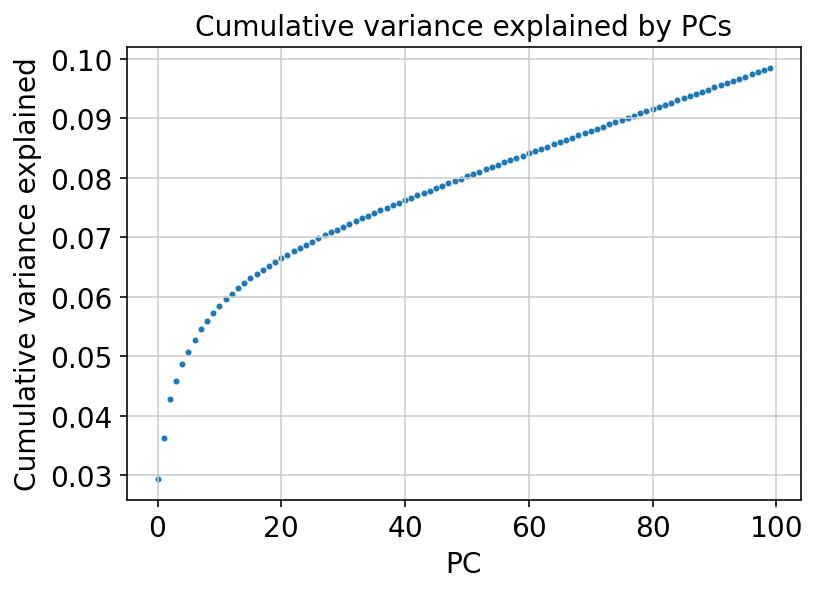

In [189]:
# Cumulative variance explained:
cml_var_explained = np.cumsum(adata.uns['pca']['variance_ratio'])
x = range(len(adata.uns['pca']['variance_ratio']))
y = cml_var_explained
plt.scatter(x, y, s=4)
plt.xlabel('PC')
plt.ylabel('Cumulative variance explained')
plt.title('Cumulative variance explained by PCs')
plt.show()

In [190]:
# set the minimum cumulative fraction of variance explained
min_cml_frac = 0.07
# find the number of PCs that together explain the minimal cum. fraction of variance
n_pcs = next(idx for idx,cml_frac in enumerate(cml_var_explained) if cml_frac > min_cml_frac)
print('Number of PCs that together explain a fraction of ' + str(min_cml_frac) + ' of the variance: ' + str(n_pcs))

Number of PCs that together explain a fraction of 0.07 of the variance: 27


In [197]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=10,use_rep='X_pca')
sc.tl.umap(adata)

computing neighbors
    finished (0:00:04)
computing UMAP
    finished (0:01:06)


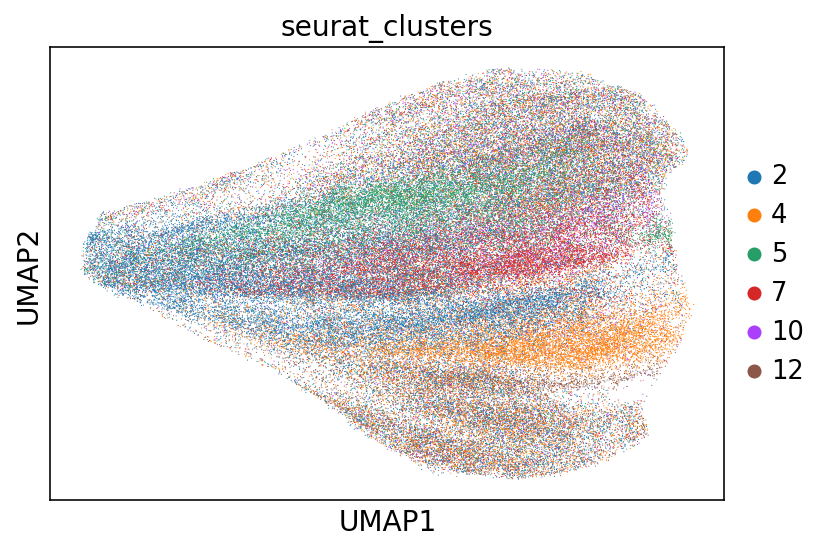

In [198]:
sc.pl.umap(
    adata, 
    color=['seurat_clusters'], 
    title=["seurat_clusters"]
)

In [148]:
adata_concat

AnnData object with n_obs × n_vars = 100333 × 22223
    obs: 'is_cell', 'high_confidence', 'multi_chain', 'extra_chains', 'IR_VJ_1_c_call', 'IR_VJ_2_c_call', 'IR_VDJ_1_c_call', 'IR_VDJ_2_c_call', 'IR_VJ_1_consensus_count', 'IR_VJ_2_consensus_count', 'IR_VDJ_1_consensus_count', 'IR_VDJ_2_consensus_count', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_duplicate_count', 'IR_VJ_2_duplicate_count', 'IR_VDJ_1_duplicate_count', 'IR_VDJ_2_duplicate_count', 'IR_VJ_1_j_call', 'IR_VJ_2_j_call', 'IR_VDJ_1_j_call', 'IR_VDJ_2_j_call', 'IR_VJ_1_junction', 'IR_VJ_2_junction', 'IR_VDJ_1_junction', 'IR_VDJ_2_junction', 'IR_VJ_1_junction_aa', 'IR_VJ_2_junction_aa', 'IR_VDJ_1_junction_aa', 'IR_VDJ_2_junction_aa', 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_productive', 'IR_VJ_2_productive', 'IR_VDJ_1_productive', 'IR_VDJ_2_productive', 'IR_VJ_1_v_call', 'IR_VJ_2_v_call', 'IR_VDJ_1_v_call', 'IR_VDJ_2_v_call', 'has_ir', 'Sample', 'celli

### TCR Quality Control

In [199]:
ir.tl.chain_qc(adataCD4_MD043_011)
ir.tl.chain_qc(adataCD4_MD01_005)
ir.tl.chain_qc(adataCD4_MD01_004)
ir.tl.chain_qc(adata_concat)

#### by tissue

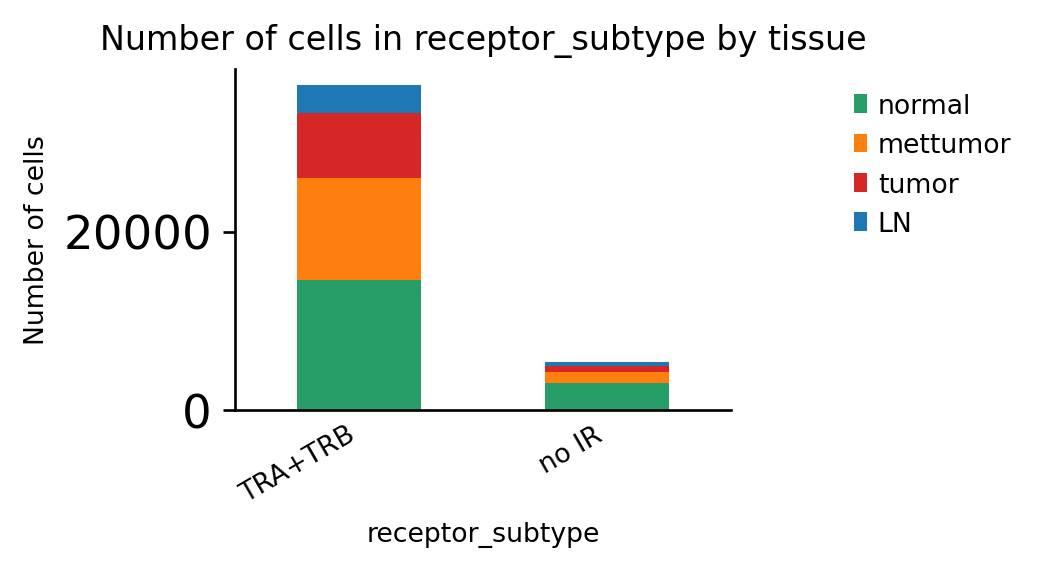

In [200]:
ax = ir.pl.group_abundance(adataCD4_MD043_011, groupby="receptor_subtype", target_col="tissue")

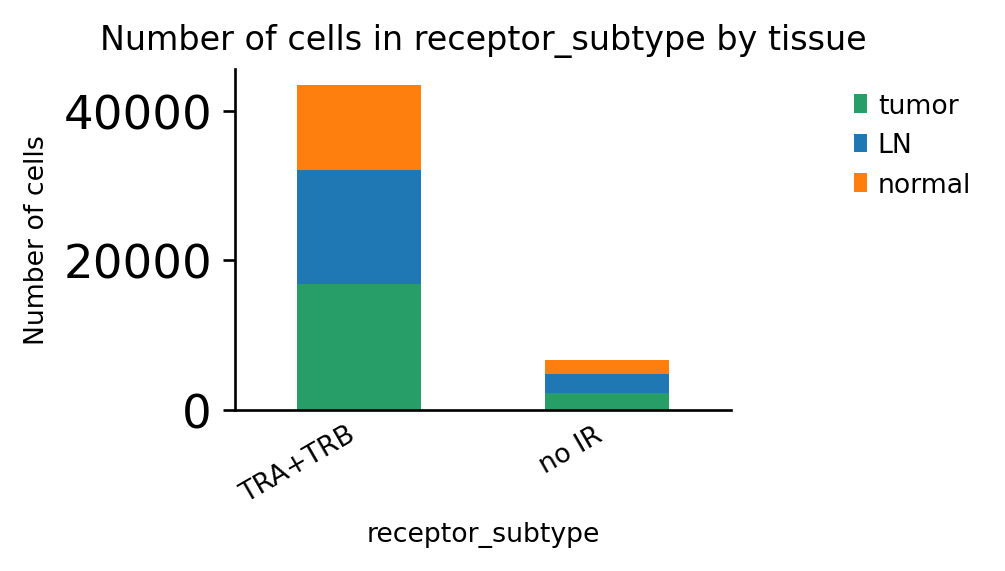

In [201]:
ax = ir.pl.group_abundance(adataCD4_MD01_005, groupby="receptor_subtype", target_col="tissue")

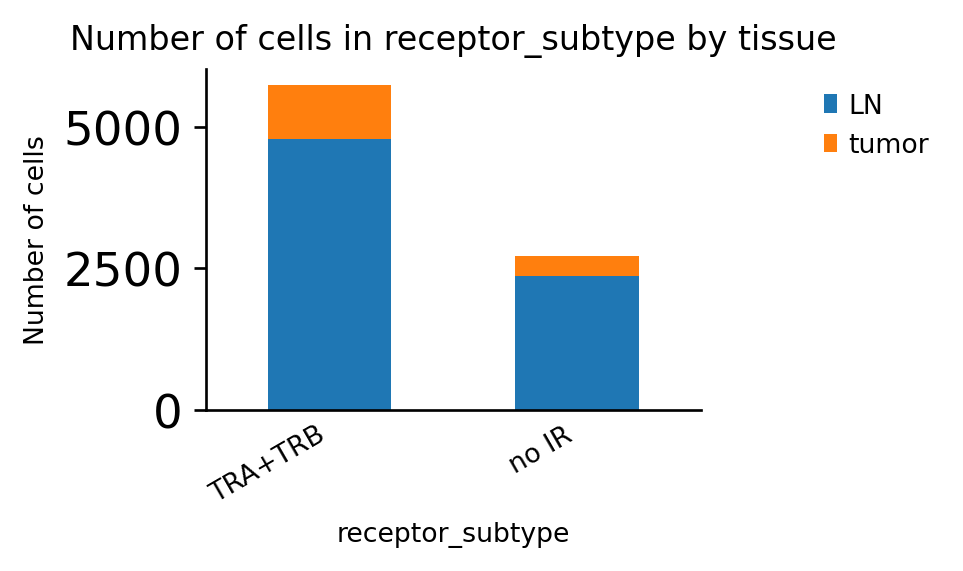

In [202]:
ax = ir.pl.group_abundance(adataCD4_MD01_004, groupby="receptor_subtype", target_col="tissue")

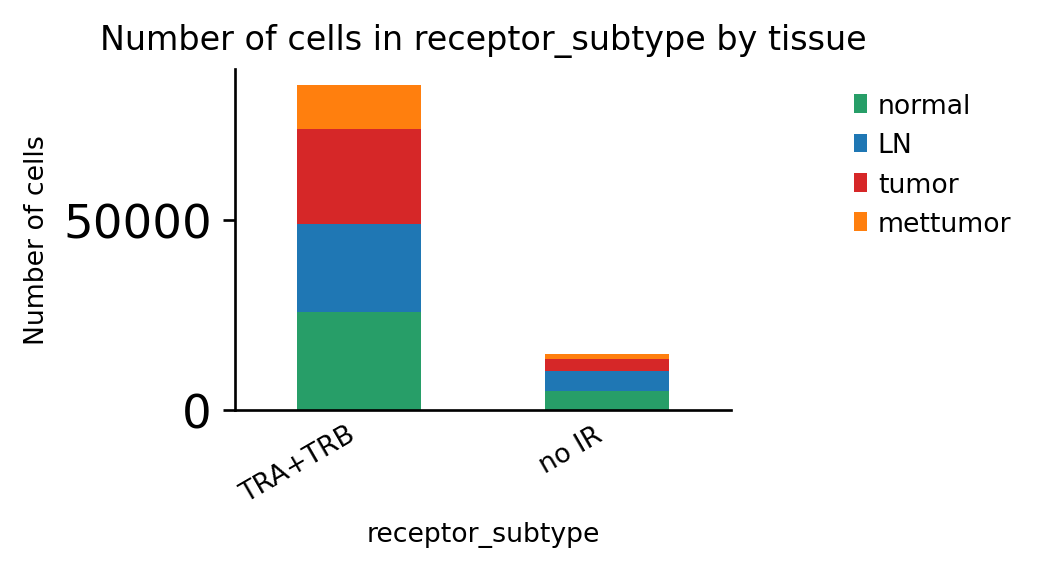

In [203]:
ax = ir.pl.group_abundance(adata_concat, groupby="receptor_subtype", target_col="tissue")

#### by cluster

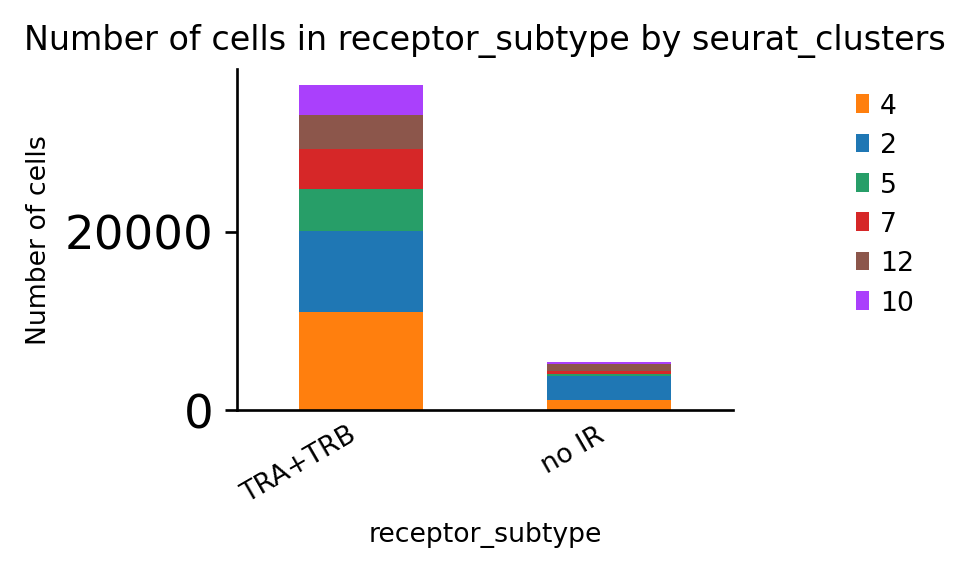

In [204]:
ax = ir.pl.group_abundance(adataCD4_MD043_011, groupby="receptor_subtype", target_col="seurat_clusters")

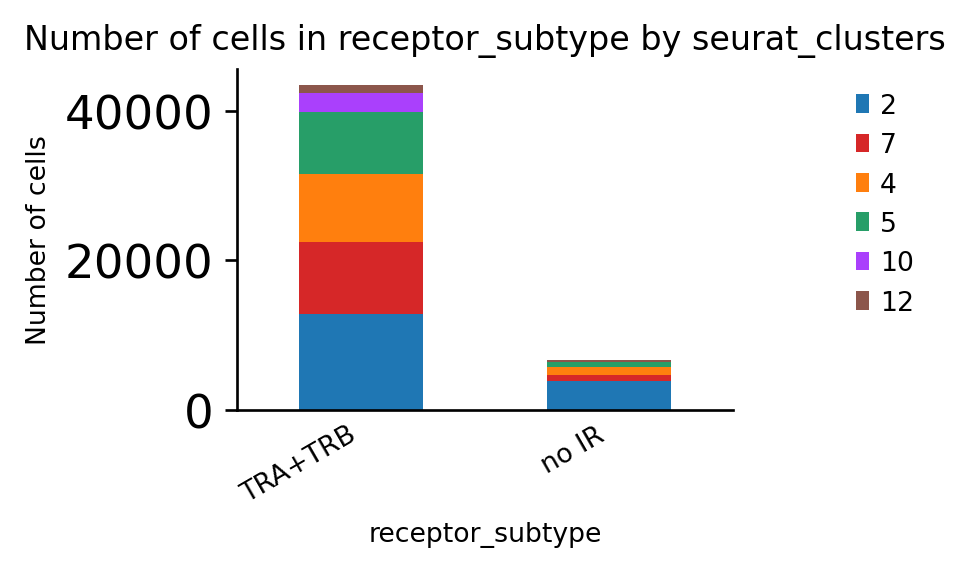

In [205]:
ax = ir.pl.group_abundance(adataCD4_MD01_005, groupby="receptor_subtype", target_col="seurat_clusters")

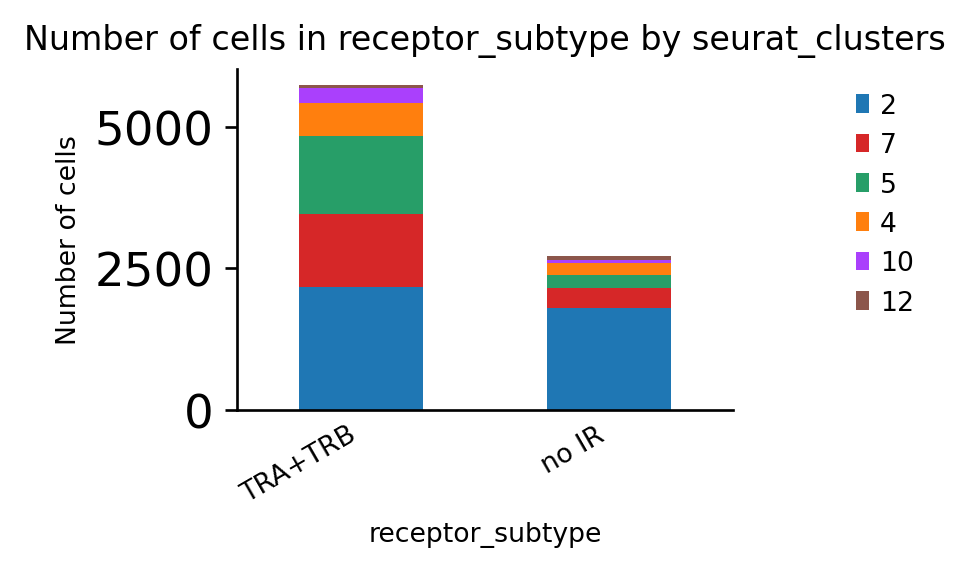

In [206]:
ax = ir.pl.group_abundance(adataCD4_MD01_004, groupby="receptor_subtype", target_col="seurat_clusters")

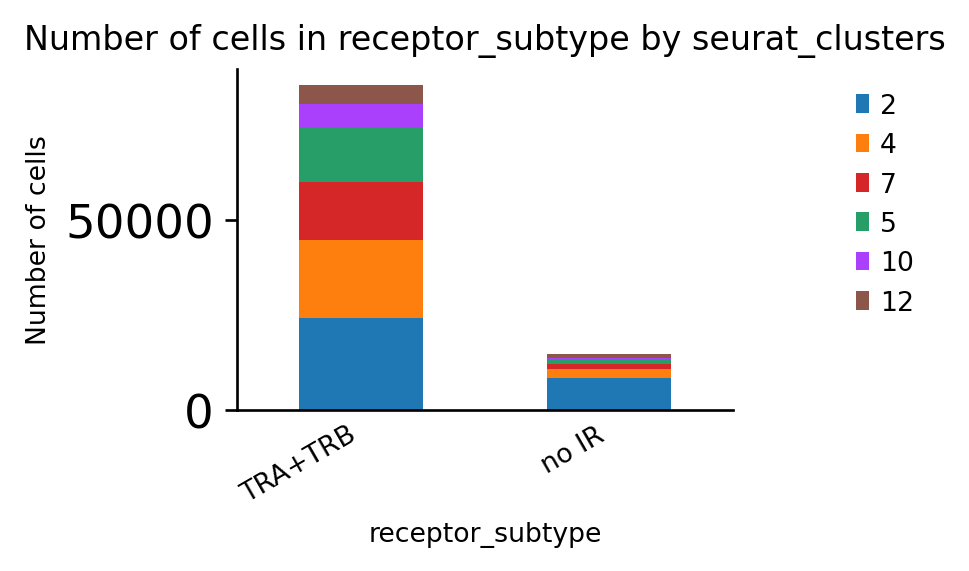

In [207]:
ax = ir.pl.group_abundance(adata_concat, groupby="receptor_subtype", target_col="seurat_clusters")

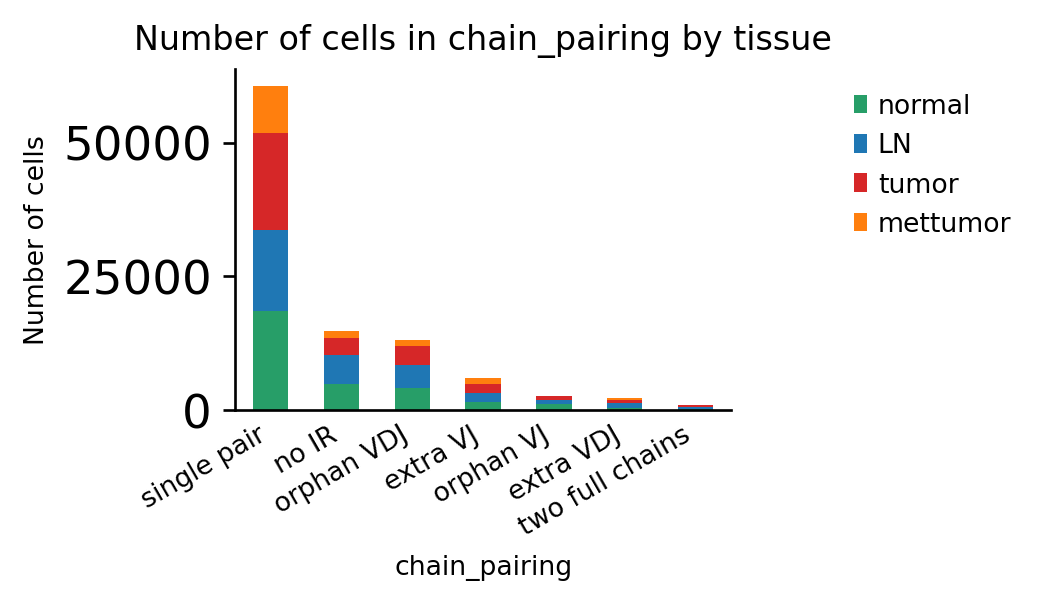

In [208]:
ax = ir.pl.group_abundance(adata_concat, groupby="chain_pairing", target_col="tissue")

In [209]:
print(
    "Fraction of cells with more than one pair of TCRs: {:.2f}".format(
        np.sum(
            adata.obs["chain_pairing"].isin(
                ["extra VJ", "extra VDJ", "two full chains"]
            )
        )
        / adata.n_obs
    )
)

Fraction of cells with more than one pair of TCRs: 0.09


#Indeed, in this dataset, ~9% of cells have more than one pair of productive T-cell receptors

In [ ]:
#adata_filt = adata[adata.obs["chain_pairing"] != "no IR", :].copy()

### Filtering

In [305]:
adata_chain_filtering = adata[~adata.obs["chain_pairing"].isin(["no IR",'orphan VDJ', 'orphan VJ','extra VDJ', 'extra VJ']),:]

In [309]:
adata_filt = adata_chain_filtering[~adata_chain_filtering.obs['tissue'].isin(['mettumor']),:]

In [310]:
# using default parameters, `ir_dist` will compute nucleotide sequence identity
ir.pp.ir_dist(adata_filt)
ir.tl.define_clonotypes(adata_filt, receptor_arms="all", dual_ir="primary_only")

Computing sequence x sequence distance matrix for VJ sequences.
Computing sequence x sequence distance matrix for VDJ sequences.


/home/lugli/spuccio/anaconda3/envs/scanpy19/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


Initializing lookup tables. 
Computing clonotype x clonotype distances.
NB: Computation happens in chunks. The progressbar only advances when a chunk has finished. 


  0%|          | 0/26668 [00:00<?, ?it/s]

Stored clonal assignments in `adata.obs["clone_id"]`.


In [311]:
ir.tl.clonotype_network(adata_filt, min_cells=5)

<AxesSubplot:>

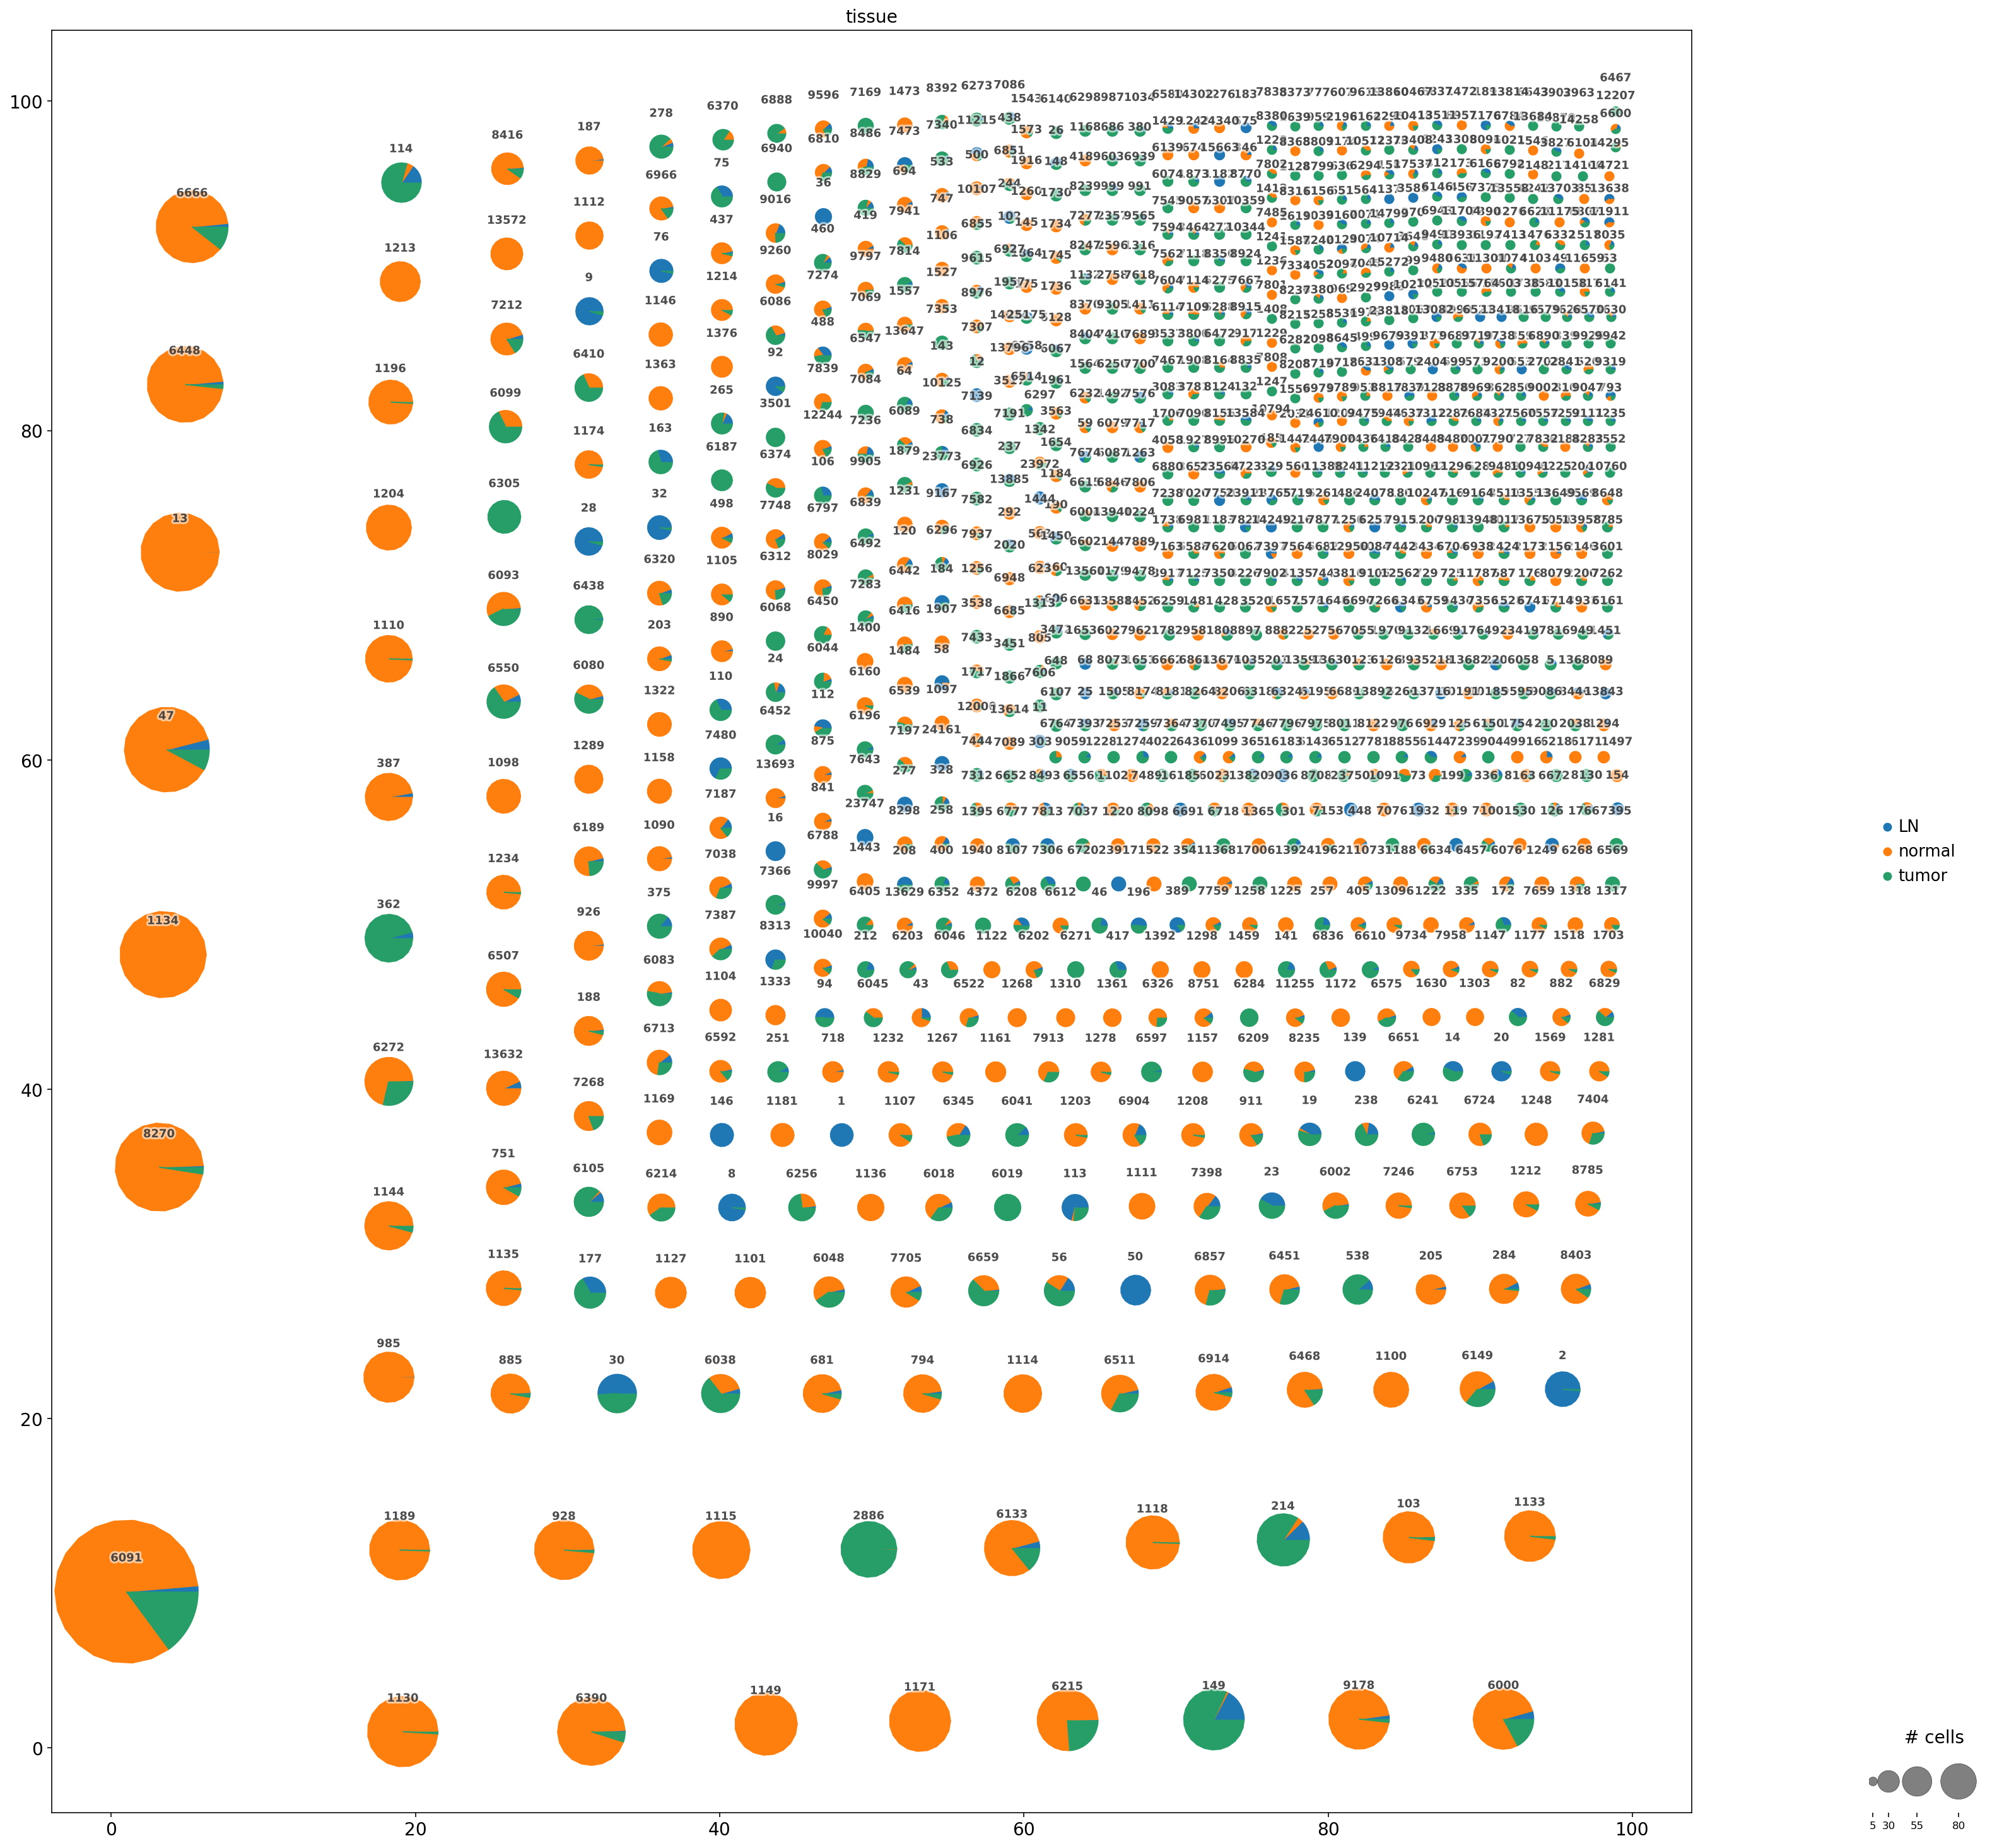

In [312]:
ir.pl.clonotype_network(
    adata_filt, color="tissue", base_size=10, label_fontsize=9, panel_size=(25, 25)
)

In [313]:
adata_treg =  adata_filt[adata_filt.obs["seurat_clusters"] == "5", :].copy()

In [314]:
# using default parameters, `ir_dist` will compute nucleotide sequence identity
ir.pp.ir_dist(adata_treg)
ir.tl.define_clonotypes(adata_treg, receptor_arms="all", dual_ir="primary_only")

Computing sequence x sequence distance matrix for VJ sequences.
Computing sequence x sequence distance matrix for VDJ sequences.
Initializing lookup tables. 
Computing clonotype x clonotype distances.
NB: Computation happens in chunks. The progressbar only advances when a chunk has finished. 


  0%|          | 0/6851 [00:00<?, ?it/s]

Stored clonal assignments in `adata.obs["clone_id"]`.


In [320]:
ir.tl.clonotype_network(adata_treg, min_cells=3)

<AxesSubplot:>

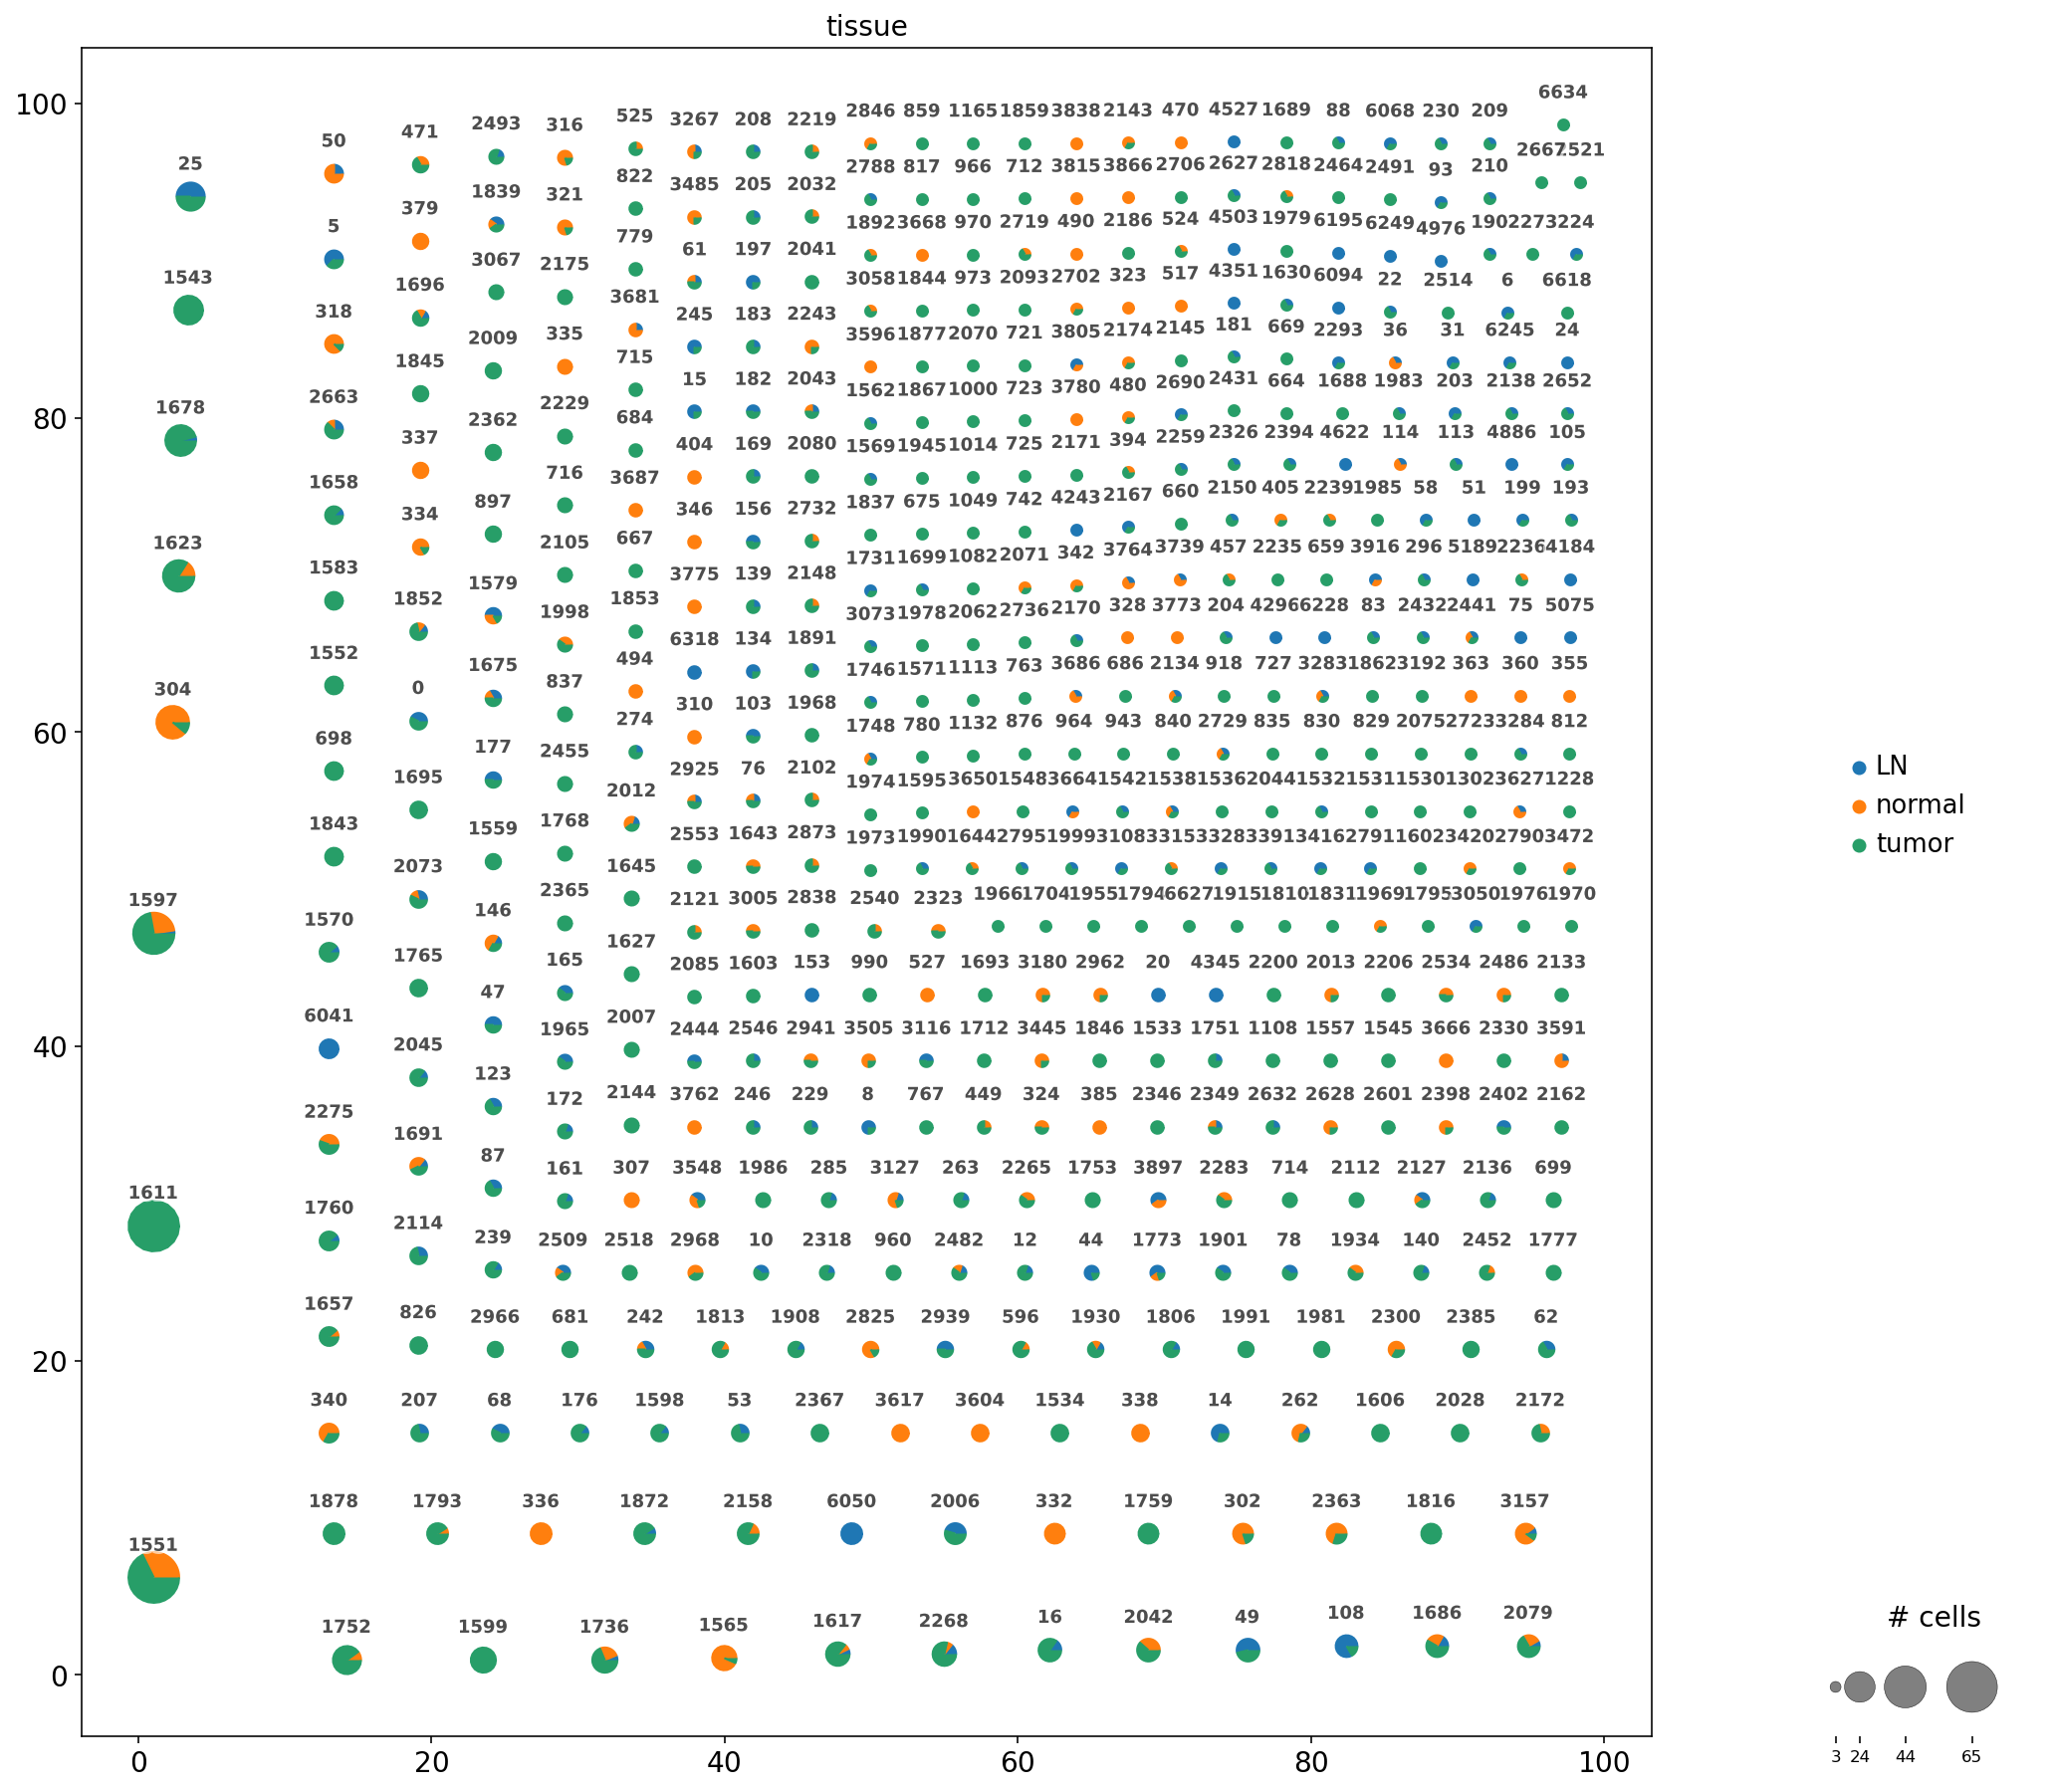

In [321]:
ir.pl.clonotype_network(
    adata_treg, color="tissue", base_size=10, label_fontsize=9, panel_size=(15, 15)
)

In [371]:
adata_treg.obs

is_cell high_confidence multi_chain  \
MD043-011:LN-1_AAGGCAGAGAATGTTG-1      True            True       False   
MD043-011:LN-1_ACACCAATCGAATGGG-1      True            True       False   
MD043-011:LN-1_ACTATCTAGCACCGCT-1      True            True       False   
MD043-011:LN-1_ACTGAACAGATATGGT-1      True            True       False   
MD043-011:LN-1_AGAATAGCAATCGGTT-1      True            True       False   
...                                     ...             ...         ...   
MD01-004:tumor-1_TTGCCGTTCTGCGACG-1    True            True       False   
MD01-004:tumor-1_TTGGAACAGCAGGTCA-1    True            True       False   
MD01-004:tumor-1_TTGGCAACACCTTGTC-1    True            True       False   
MD01-004:tumor-1_TTTGCGCTCTCTTATG-1    True            True       False   
MD01-004:tumor-1_TTTGTCAGTATGCTTG-1    True            True       False   

                                                                          extra_chains  \
MD043-011:LN-1_AAGGCAGAGAATGTTG-1                                                   []   
MD043-011:LN-1_ACACCAATCGAATGGG-1                                                   []   
MD043-011:LN-1_ACTATCTAGCACCGCT-1                                                   []   
MD043-011:LN-1_ACTGAACAGATATGGT-1    [{"c_call": "TRAC", "consensus_count": 1489, "...   
MD043-011:LN-1_AGAATAGCAATCGGTT-1    [{"c_call": "TRAC", "consensus_count": 3359, "...   
...                                                                                ...   
MD01-004:tumor-1_TTGCCGTTCTGCGACG-1  [{"c_call": "TRBC2", "consensus_count": 7186, ...   
MD01-004:tumor-1_TTGGAACAGCAGGTCA-1                                                 []   
MD01-004:tumor-1_TTGGCAACACCTTGTC-1  [{"c_call": "TRAC", "consensus_count": 7658, "...   
MD01-004:tumor-1_TTTGCGCTCTCTTATG-1                                                 []   
MD01-004:tumor-1_TTTGTCAGTATGCTTG-1                                                 []   

                                    IR_VJ_1_c_call IR_VJ_2_c_call  \
MD043-011:LN-1_AAGGCAGAGAATGTTG-1             TRAC            NaN   
MD043-011:LN-1_ACACCAATCGAATGGG-1             TRAC            NaN   
MD043-011:LN-1_ACTATCTAGCACCGCT-1             TRAC            NaN   
MD043-011:LN-1_ACTGAACAGATATGGT-1             TRAC            NaN   
MD043-011:LN-1_AGAATAGCAATCGGTT-1             TRAC            NaN   
...                                            ...            ...   
MD01-004:tumor-1_TTGCCGTTCTGCGACG-1           TRAC            NaN   
MD01-004:tumor-1_TTGGAACAGCAGGTCA-1           TRAC            NaN   
MD01-004:tumor-1_TTGGCAACACCTTGTC-1           TRAC            NaN   
MD01-004:tumor-1_TTTGCGCTCTCTTATG-1           TRAC            NaN   
MD01-004:tumor-1_TTTGTCAGTATGCTTG-1           TRAC            NaN   

                                    IR_VDJ_1_c_call IR_VDJ_2_c_call  \
MD043-011:LN-1_AAGGCAGAGAATGTTG-1             TRBC2             NaN   
MD043-011:LN-1_ACACCAATCGAATGGG-1             TRBC2             NaN   
MD043-011:LN-1_ACTATCTAGCACCGCT-1             TRBC2             NaN   
MD043-011:LN-1_ACTGAACAGATATGGT-1               NaN             NaN   
MD043-011:LN-1_AGAATAGCAATCGGTT-1             TRBC1             NaN   
...                                             ...             ...   
MD01-004:tumor-1_TTGCCGTTCTGCGACG-1           TRBC2             NaN   
MD01-004:tumor-1_TTGGAACAGCAGGTCA-1           TRBC2             NaN   
MD01-004:tumor-1_TTGGCAACACCTTGTC-1           TRBC2             NaN   
MD01-004:tumor-1_TTTGCGCTCTCTTATG-1           TRBC2             NaN   
MD01-004:tumor-1_TTTGTCAGTATGCTTG-1           TRBC2             NaN   

                                     IR_VJ_1_consensus_count  \
MD043-011:LN-1_AAGGCAGAGAATGTTG-1                     6385.0   
MD043-011:LN-1_ACACCAATCGAATGGG-1                    15472.0   
MD043-011:LN-1_ACTATCTAGCACCGCT-1                    31493.0   
MD043-011:LN-1_ACTGAACAGATATGGT-1                     8826.0   
MD043-011:LN-1_AGAATAGCAATCGGTT-1                   

In [375]:
adata_treg.obs.loc[adata_treg.obs["cc_aa_alignment"] == "1551", :].groupby(
    [
        "IR_VJ_1_junction_aa","IR_VDJ_1_junction_aa",

        "receptor_subtype",
    ],
    observed=True,
).size().reset_index(name="n_cells")

KeyError: 'cc_aa_alignment'

In [376]:
adata_treg.obs.loc[adata_treg.obs["cc_aa_alignment"] == "1551", :]

KeyError: 'cc_aa_alignment'

#### Re-compute CDR3 neighborhood graph and define clonotype cluster

In [322]:
ir.pp.ir_dist(
    adata_filt,
    metric="alignment",
    sequence="aa",
    cutoff=15,
)

Computing sequence x sequence distance matrix for VJ sequences.


  0%|          | 0/118341 [00:00<?, ?it/s]

Computing sequence x sequence distance matrix for VDJ sequences.


  0%|          | 0/135460 [00:00<?, ?it/s]

In [323]:
ir.tl.define_clonotype_clusters(
    adata_filt, sequence="aa", metric="alignment", receptor_arms="all", dual_ir="any"
)

Initializing lookup tables. 
Computing clonotype x clonotype distances.
NB: Computation happens in chunks. The progressbar only advances when a chunk has finished. 


  0%|          | 0/26769 [00:00<?, ?it/s]

Stored clonal assignments in `adata.obs["cc_aa_alignment"]`.


In [327]:
ir.tl.clonotype_network(adata_filt, min_cells=5, sequence="aa", metric="alignment")

<AxesSubplot:>

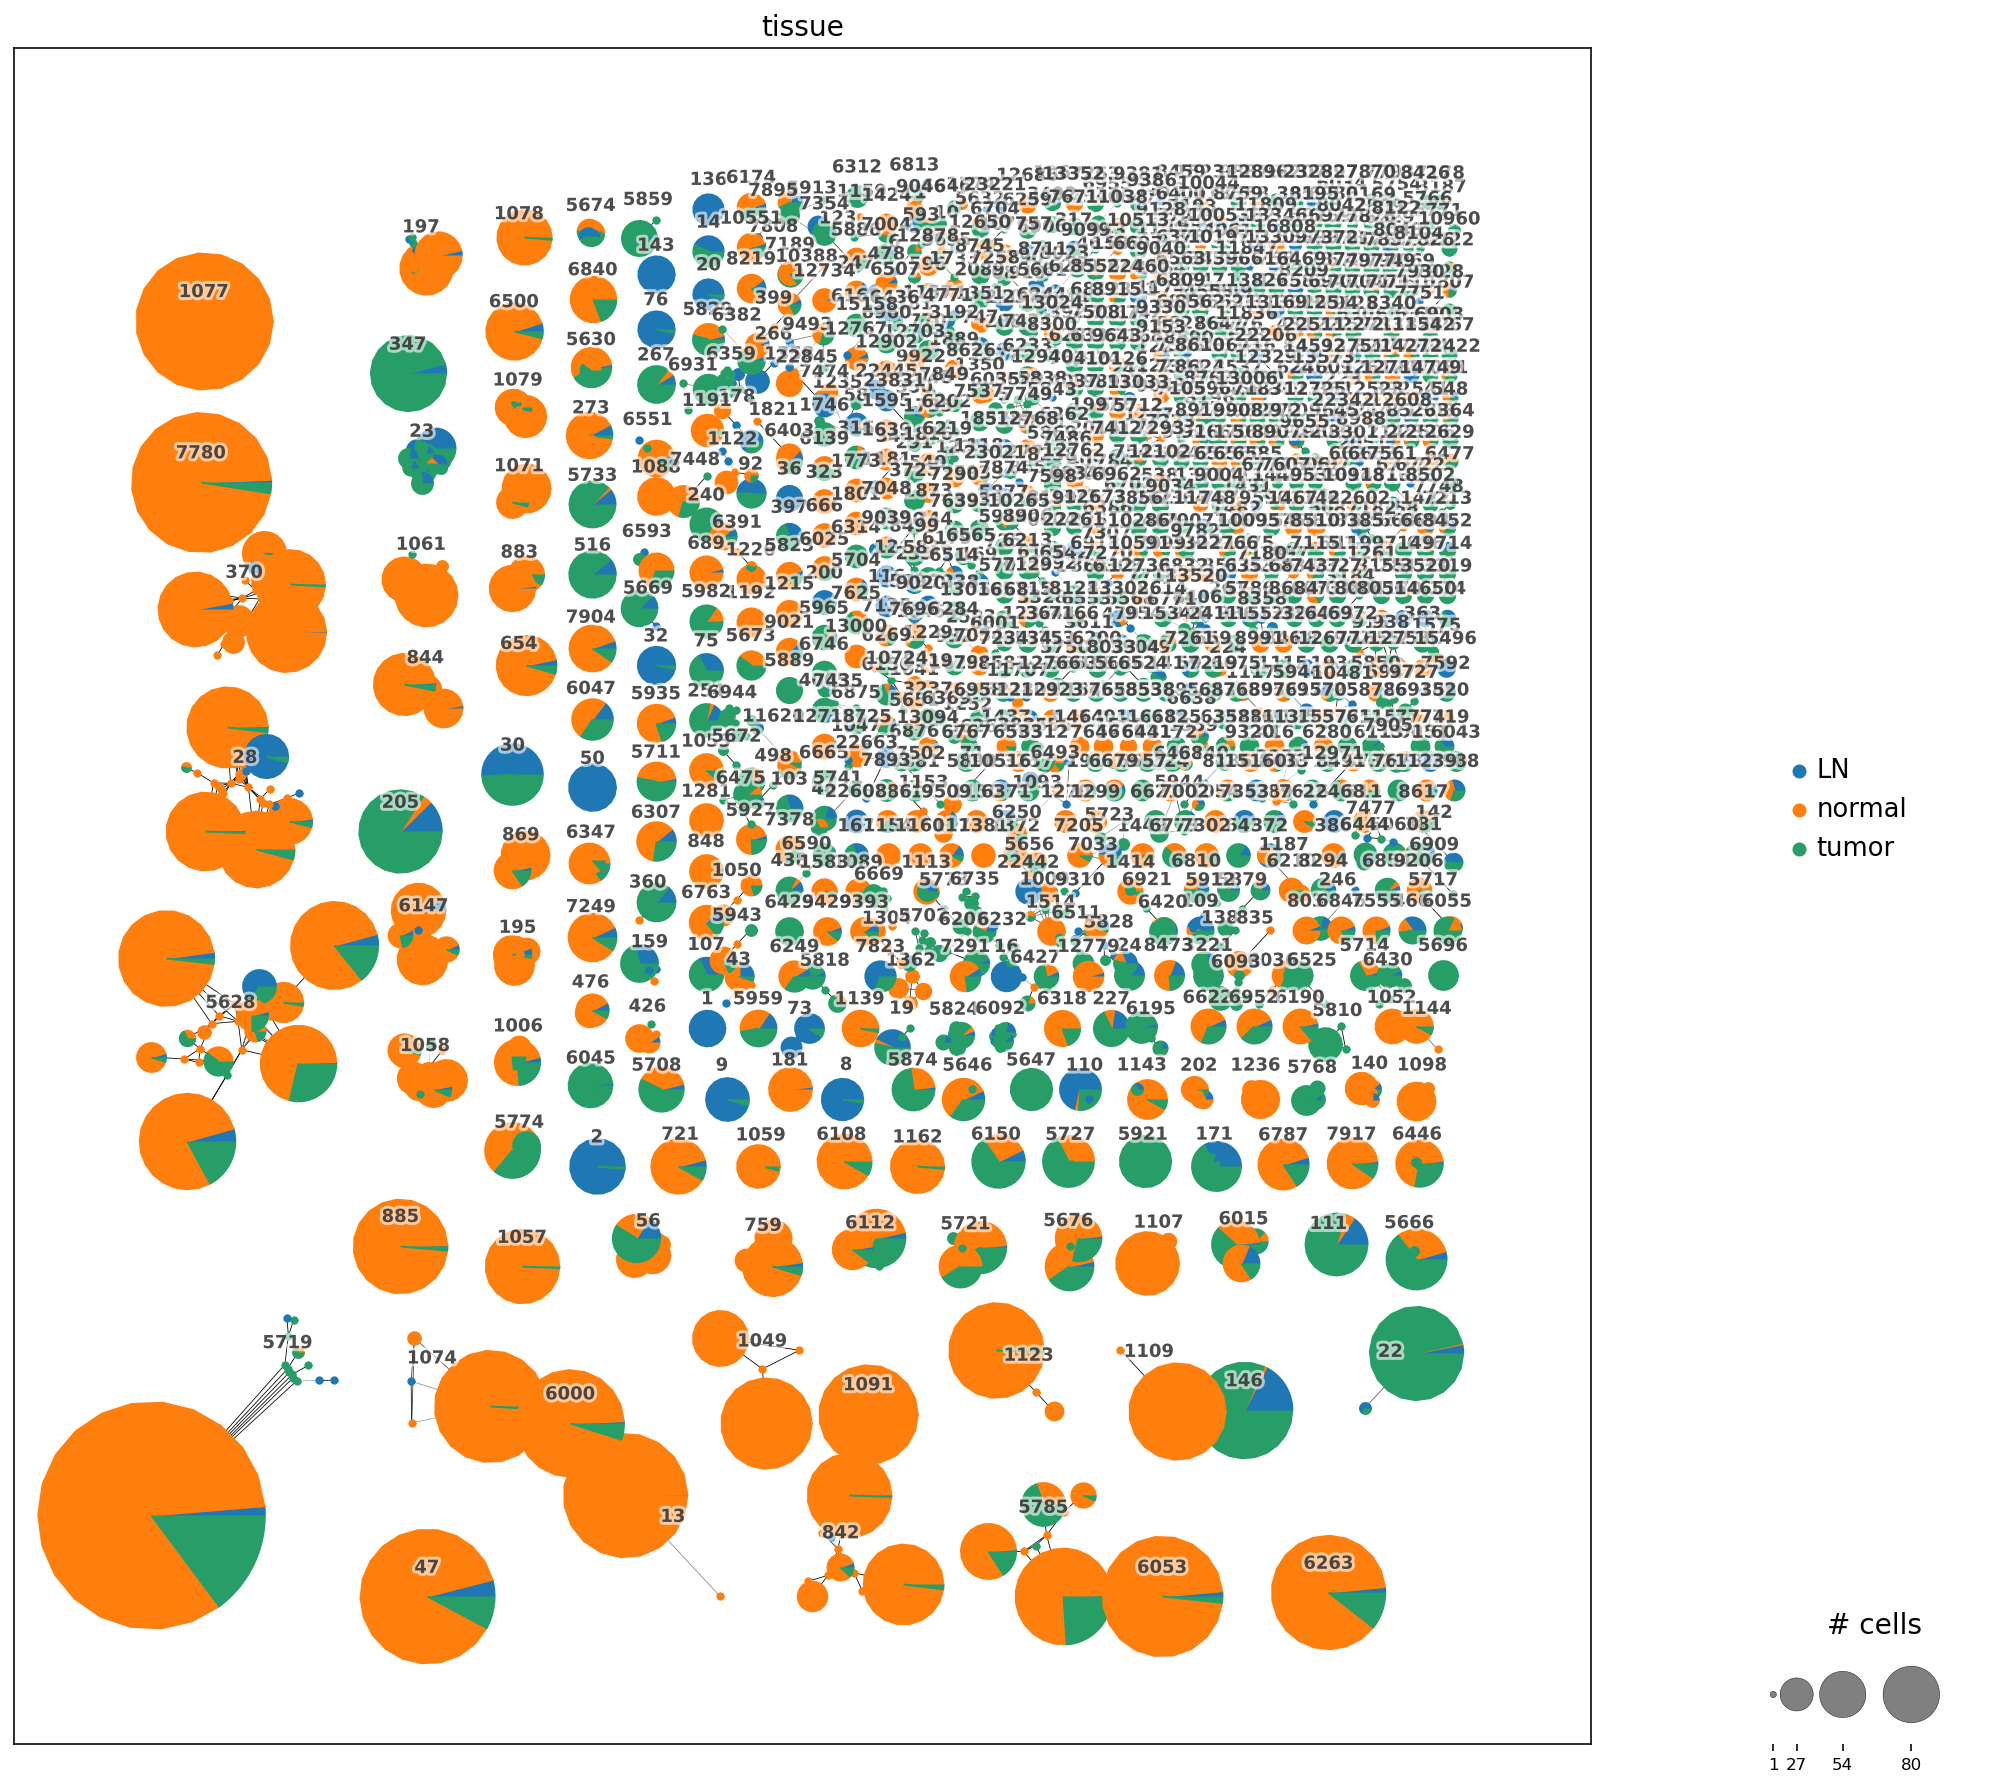

In [328]:
ir.pl.clonotype_network(
    adata_filt, color="tissue", base_size=10, label_fontsize=9, panel_size=(15, 15)
)

ir.pl.clonotype_network(
    adata_filt, color="tissue", base_size=10, label_fontsize=5, panel_size=(30, 30)
)

In [370]:
adata_filt.obs.loc[adata_filt.obs["cc_aa_alignment"] == "47", :].groupby(
    [
        "IR_VJ_1_junction_aa","IR_VDJ_1_junction_aa",

        "receptor_subtype",
    ],
    observed=True,
).size().reset_index(name="n_cells")

IR_VJ_1_junction_aa IR_VDJ_1_junction_aa receptor_subtype  n_cells
0      CAGRGETNAGKSTF         CSALVGGEKLFF          TRA+TRB      449

In [363]:
pd.DataFrame(adata_filt.obs.loc[adata_filt.obs["cc_aa_alignment"] == "47", :]).to_csv("/home/lugli/spuccio/Projects/SP035_TregIntegration/Hopkins/Clone_47.csv",
                                                                                      sep=",",header=True,index=False)

In [388]:
adata_treg.obs.loc[adata_treg.obs["clone_id"] == "1551", :]

is_cell high_confidence multi_chain  \
MD01-005:tumor-9_ACCGTAACATGGTCAT-1     True            True       False   
MD01-005:tumor-9_ATAAGAGAGACAGACC-1     True            True       False   
MD01-005:tumor-9_CTCAGAAAGTGGTAGC-1     True            True       False   
MD01-005:tumor-9_GATCAGTTCCAGATCA-1     True            True       False   
MD01-005:tumor-9_GTCGTAATCCTGCAGG-1     True            True       False   
...                                      ...             ...         ...   
MD01-005:normal-2_TGAGCCGCAGCTGCAC-1    True            True       False   
MD01-005:normal-2_TGGCCAGAGGCTCTTA-1    True            True       False   
MD01-005:normal-1_CCCTCCTTCACGAAGG-1    True            True       False   
MD01-005:normal-1_CGCGTTTTCCACGTTC-1    True            True       False   
MD01-005:normal-1_GTCAAGTGTAGCGTGA-1    True            True       False   

                                                                           extra_chains  \
MD01-005:tumor-9_ACCGTAACATGGTCAT-1                                                  []   
MD01-005:tumor-9_ATAAGAGAGACAGACC-1   [{"c_call": "TRBC2", "consensus_count": 2560, ...   
MD01-005:tumor-9_CTCAGAAAGTGGTAGC-1                                                  []   
MD01-005:tumor-9_GATCAGTTCCAGATCA-1                                                  []   
MD01-005:tumor-9_GTCGTAATCCTGCAGG-1                                                  []   
...                                                                                 ...   
MD01-005:normal-2_TGAGCCGCAGCTGCAC-1                                                 []   
MD01-005:normal-2_TGGCCAGAGGCTCTTA-1                                                 []   
MD01-005:normal-1_CCCTCCTTCACGAAGG-1  [{"c_call": "TRBC2", "consensus_count": 4712, ...   
MD01-005:normal-1_CGCGTTTTCCACGTTC-1                                                 []   
MD01-005:normal-1_GTCAAGTGTAGCGTGA-1  [{"c_call": "TRAC", "consensus_count": 5410, "...   

                                     IR_VJ_1_c_call IR_VJ_2_c_call  \
MD01-005:tumor-9_ACCGTAACATGGTCAT-1            TRAC            NaN   
MD01-005:tumor-9_ATAAGAGAGACAGACC-1            TRAC            NaN   
MD01-005:tumor-9_CTCAGAAAGTGGTAGC-1            TRAC            NaN   
MD01-005:tumor-9_GATCAGTTCCAGATCA-1            TRAC            NaN   
MD01-005:tumor-9_GTCGTAATCCTGCAGG-1            TRAC            NaN   
...                                             ...            ...   
MD01-005:normal-2_TGAGCCGCAGCTGCAC-1           TRAC            NaN   
MD01-005:normal-2_TGGCCAGAGGCTCTTA-1           TRAC            NaN   
MD01-005:normal-1_CCCTCCTTCACGAAGG-1           TRAC            NaN   
MD01-005:normal-1_CGCGTTTTCCACGTTC-1           TRAC            NaN   
MD01-005:normal-1_GTCAAGTGTAGCGTGA-1           TRAC            NaN   

                                     IR_VDJ_1_c_call IR_VDJ_2_c_call  \
MD01-005:tumor-9_ACCGTAACATGGTCAT-1            TRBC2             NaN   
MD01-005:tumor-9_ATAAGAGAGACAGACC-1            TRBC2             NaN   
MD01-005:tumor-9_CTCAGAAAGTGGTAGC-1            TRBC2             NaN   
MD01-005:tumor-9_GATCAGTTCCAGATCA-1            TRBC2             NaN   
MD01-005:tumor-9_GTCGTAATCCTGCAGG-1            TRBC2             NaN   
...                                              ...             ...   
MD01-005:normal-2_TGAGCCGCAGCTGCAC-1           TRBC2             NaN   
MD01-005:normal-2_TGGCCAGAGGCTCTTA-1           TRBC2             NaN   
MD01-005:normal-1_CCCTCCTTCACGAAGG-1           TRBC2             NaN   
MD01-005:normal-1_CGCGTTTTCCACGTTC-1           TRBC2             NaN   
MD01-005:normal-1_GTCAAGTGTAGCGTGA-1           TRBC2             NaN   

                                      IR_VJ_1_consensus_count  \
MD01-005:tumor-9_ACCGTAACATGGTCAT-1                     566.0   
MD01-005:tumor-9_ATAAGAGAGACAGACC-1                   11478.0   
MD01-005:tumor-9_CTCAGAAAGTGGTAGC-1                    2440.0   
MD01-005:tumor-9_GATCAGTTCCAGATCA-1                    2590.0   


<AxesSubplot:>

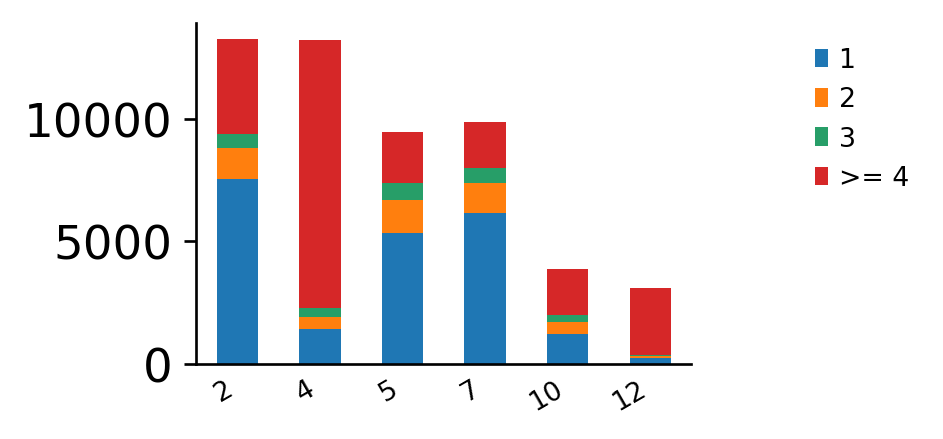

In [335]:
ir.pl.clonal_expansion(adata_filt, groupby="seurat_clusters", clip_at=4, normalize=False)

<AxesSubplot:>

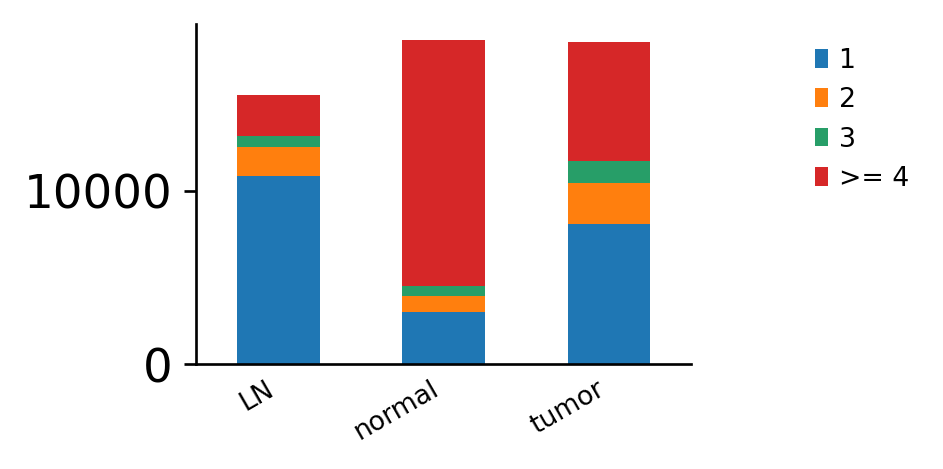

In [336]:
ir.pl.clonal_expansion(adata_filt, groupby="tissue", clip_at=4, normalize=False)

<AxesSubplot:>

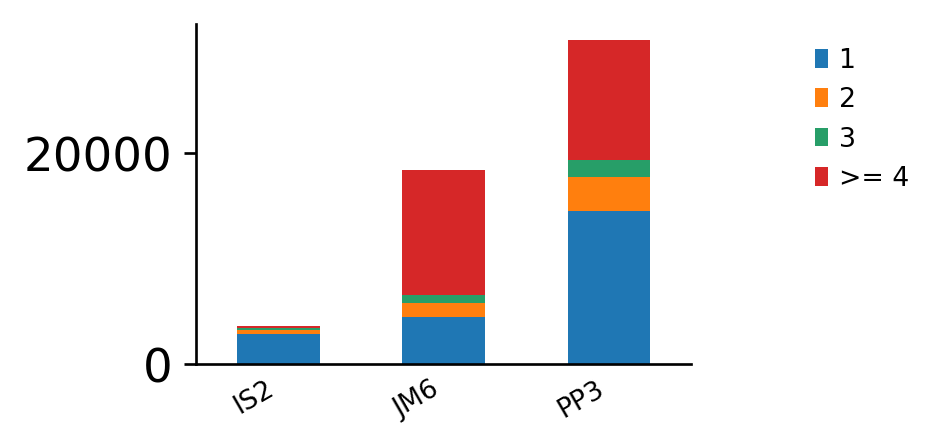

In [337]:
ir.pl.clonal_expansion(adata_filt, groupby="patient", clip_at=4, normalize=False) 

<AxesSubplot:>

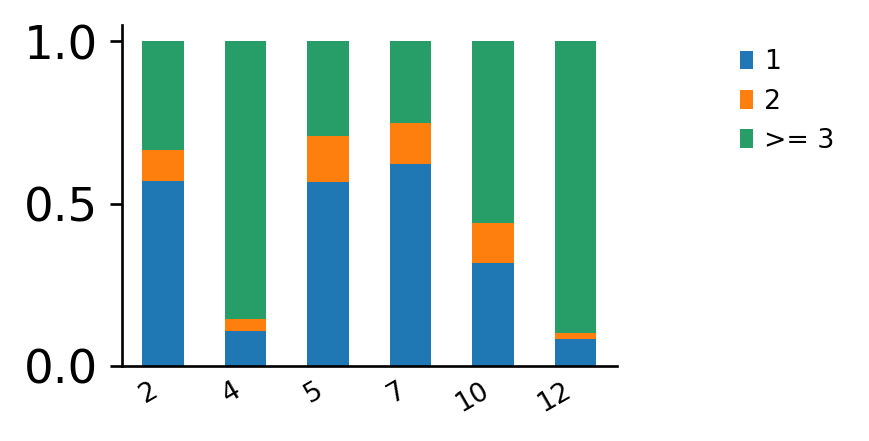

In [338]:
ir.pl.clonal_expansion(adata_filt, "seurat_clusters")

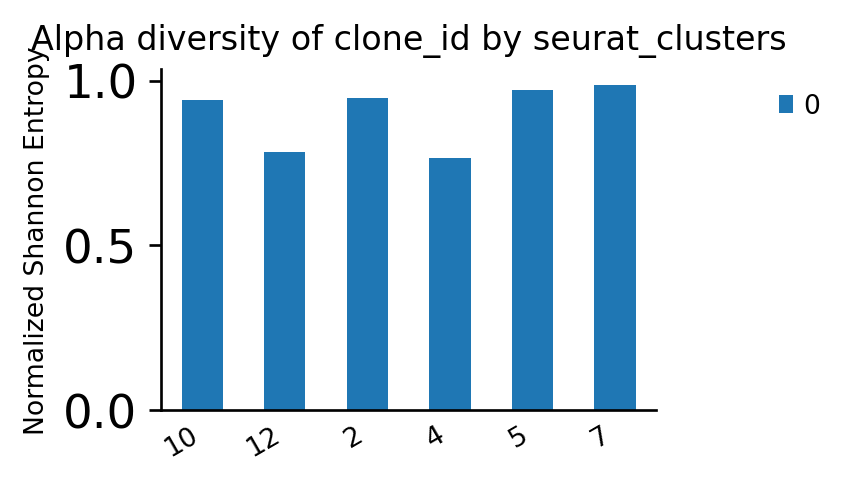

In [339]:
ax = ir.pl.alpha_diversity(
    adata_filt, metric="normalized_shannon_entropy", groupby="seurat_clusters"
)

In [ ]:
ax = ir.pl.alpha_diversity(
    adata_filt, metric="normalized_shannon_entropy", groupby="tissue"
)

In [ ]:
ax = ir.pl.alpha_diversity(
    adata_filt, metric="normalized_shannon_entropy", groupby="patient"
)

#### Clonotype abundance

<AxesSubplot:title={'center':'Number of cells in clone_id by seurat_clusters'}, xlabel='clone_id', ylabel='Number of cells'>

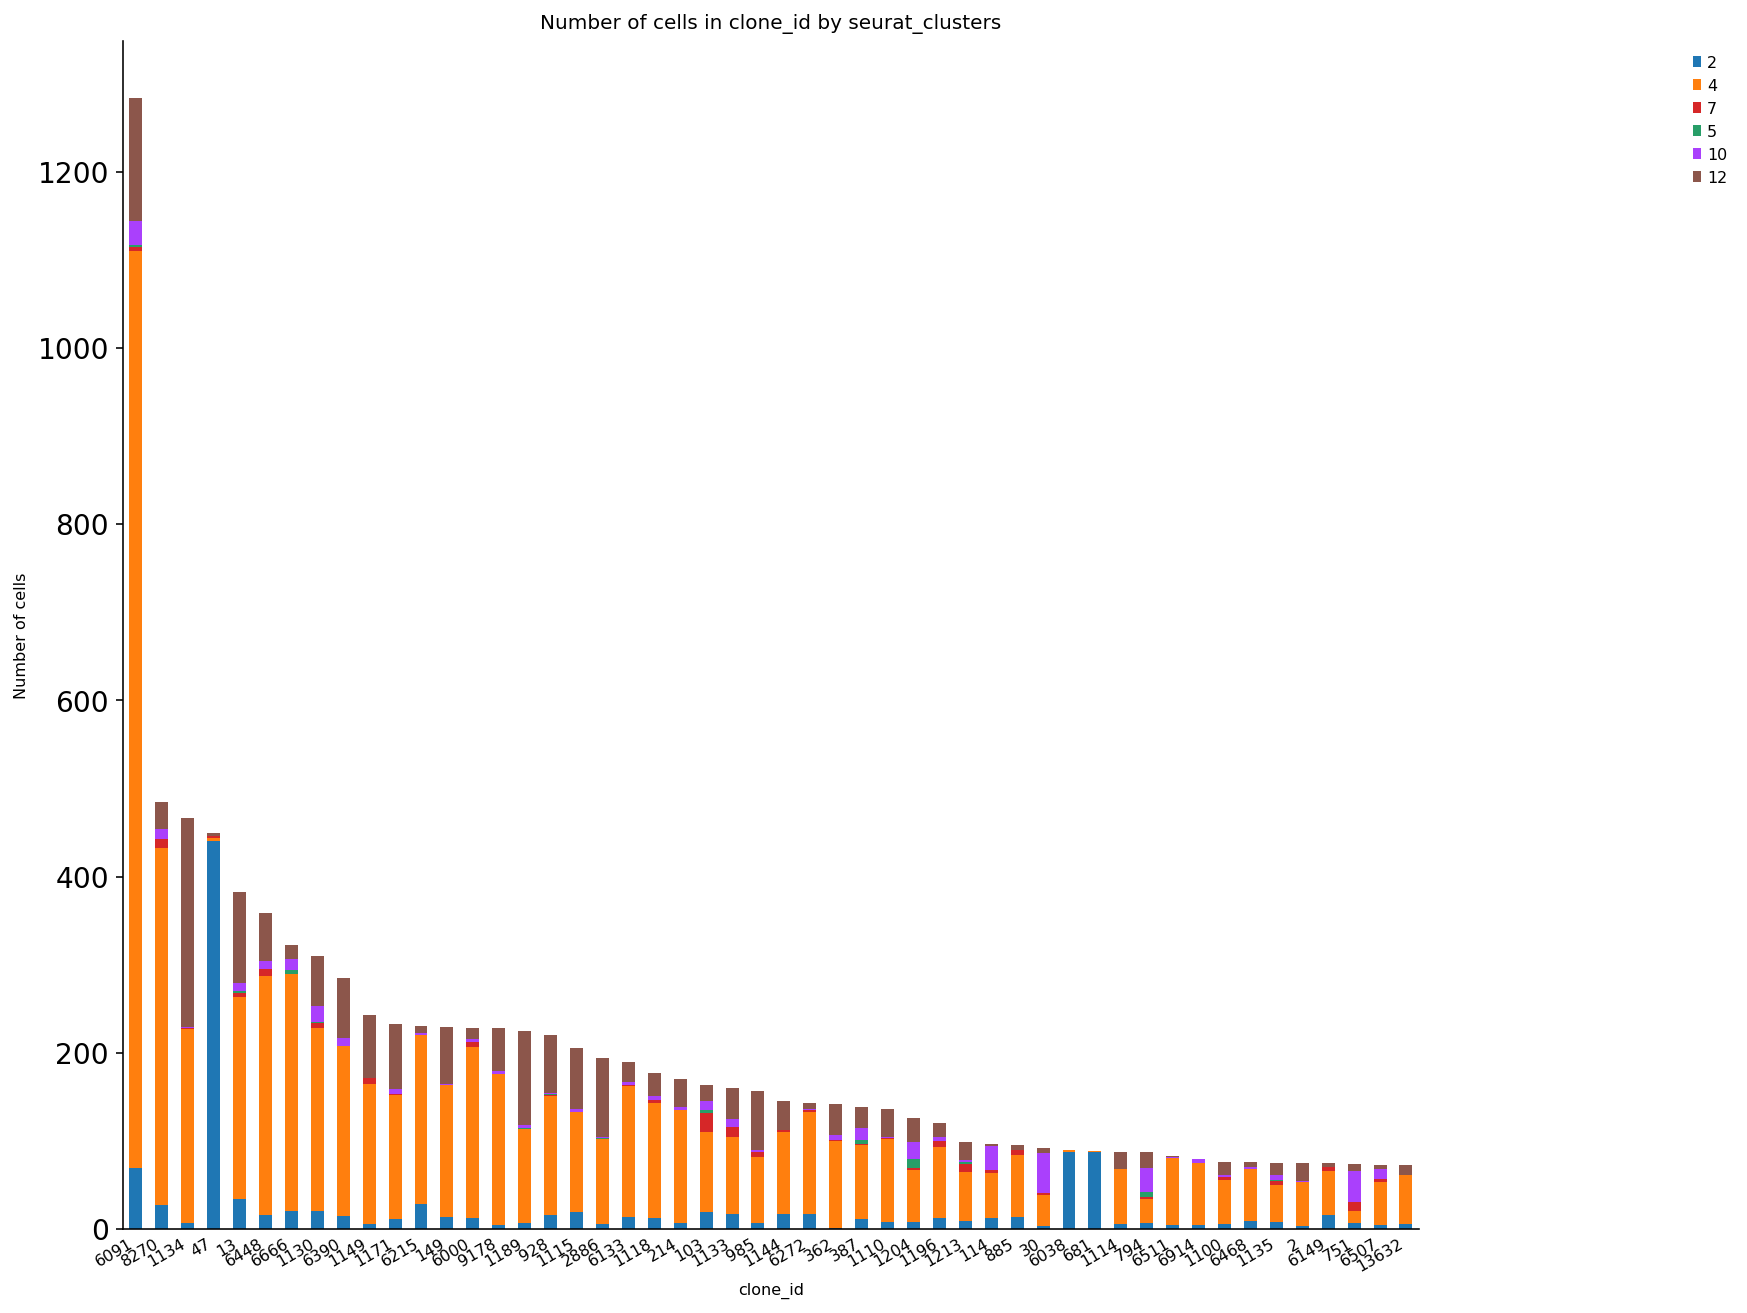

In [340]:
ir.pl.group_abundance(adata_filt, groupby="clone_id", target_col="seurat_clusters", max_cols=50,fig_kws={'figsize':[15, 15]})

<AxesSubplot:title={'center':'Number of cells in clone_id by seurat_clusters'}, xlabel='clone_id', ylabel='Number of cells'>

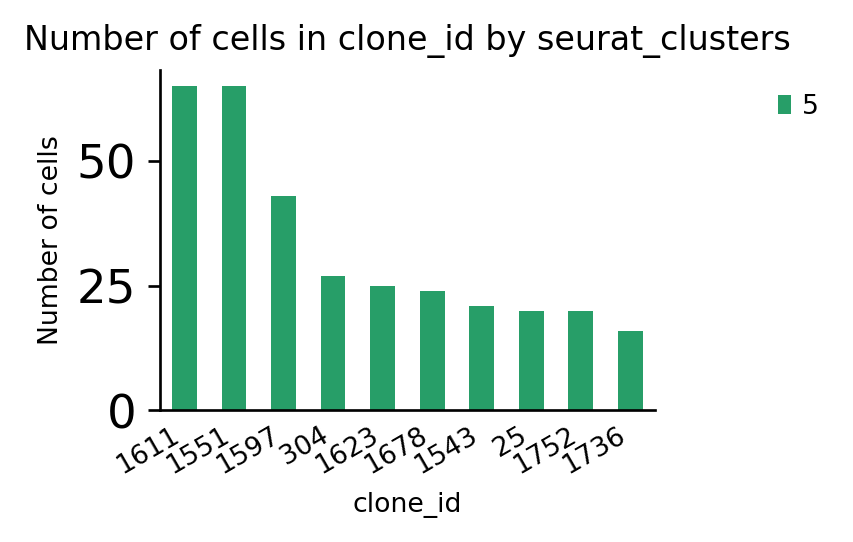

In [341]:
ir.pl.group_abundance(adata_treg, groupby="clone_id", target_col="seurat_clusters", max_cols=10)

<AxesSubplot:title={'center':'Number of cells in clone_id by tissue'}, xlabel='clone_id', ylabel='Number of cells'>

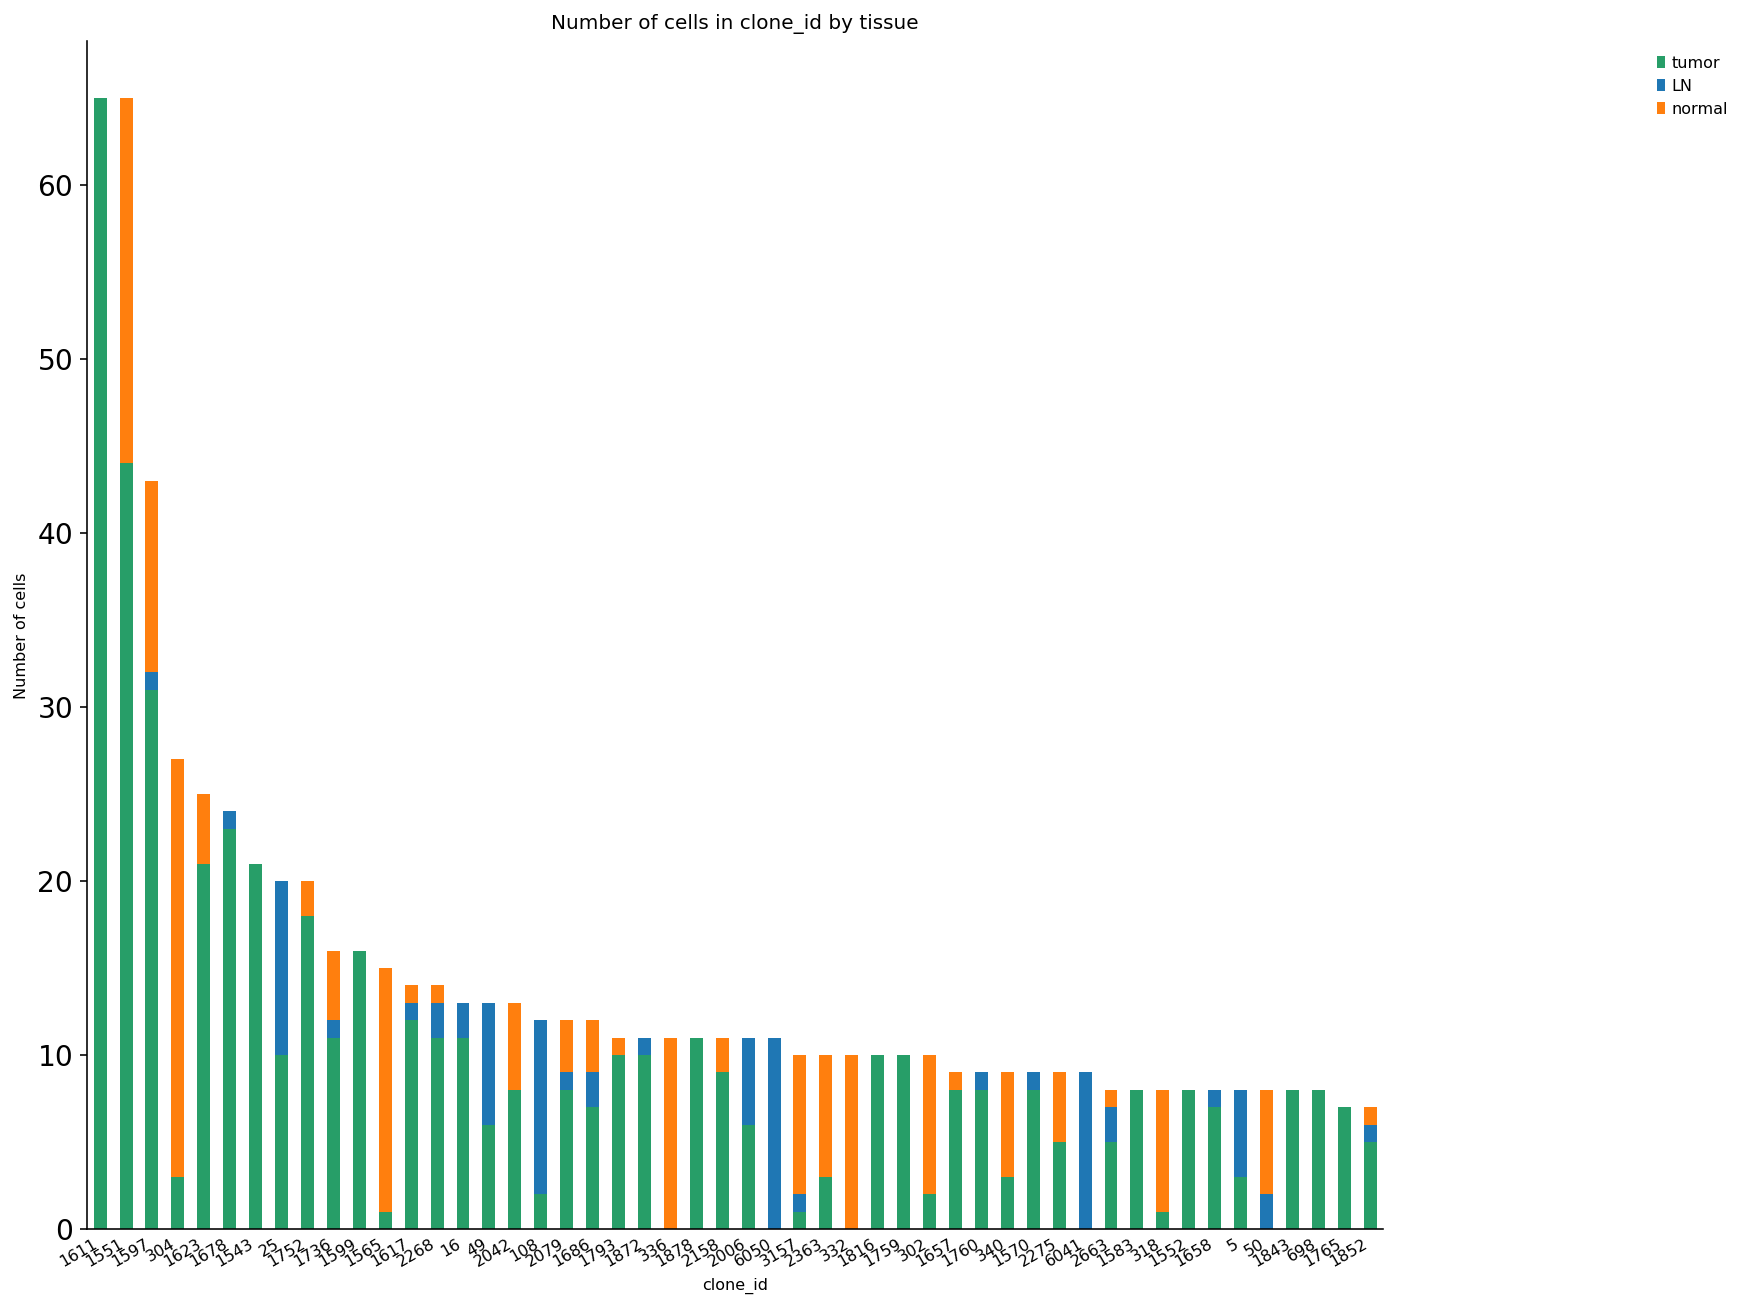

In [342]:
ir.pl.group_abundance(adata_treg, groupby="clone_id", target_col="tissue", max_cols=50,fig_kws={'figsize':[15, 15]})

<AxesSubplot:title={'center':'Number of cells in clone_id by patient'}, xlabel='clone_id', ylabel='Number of cells'>

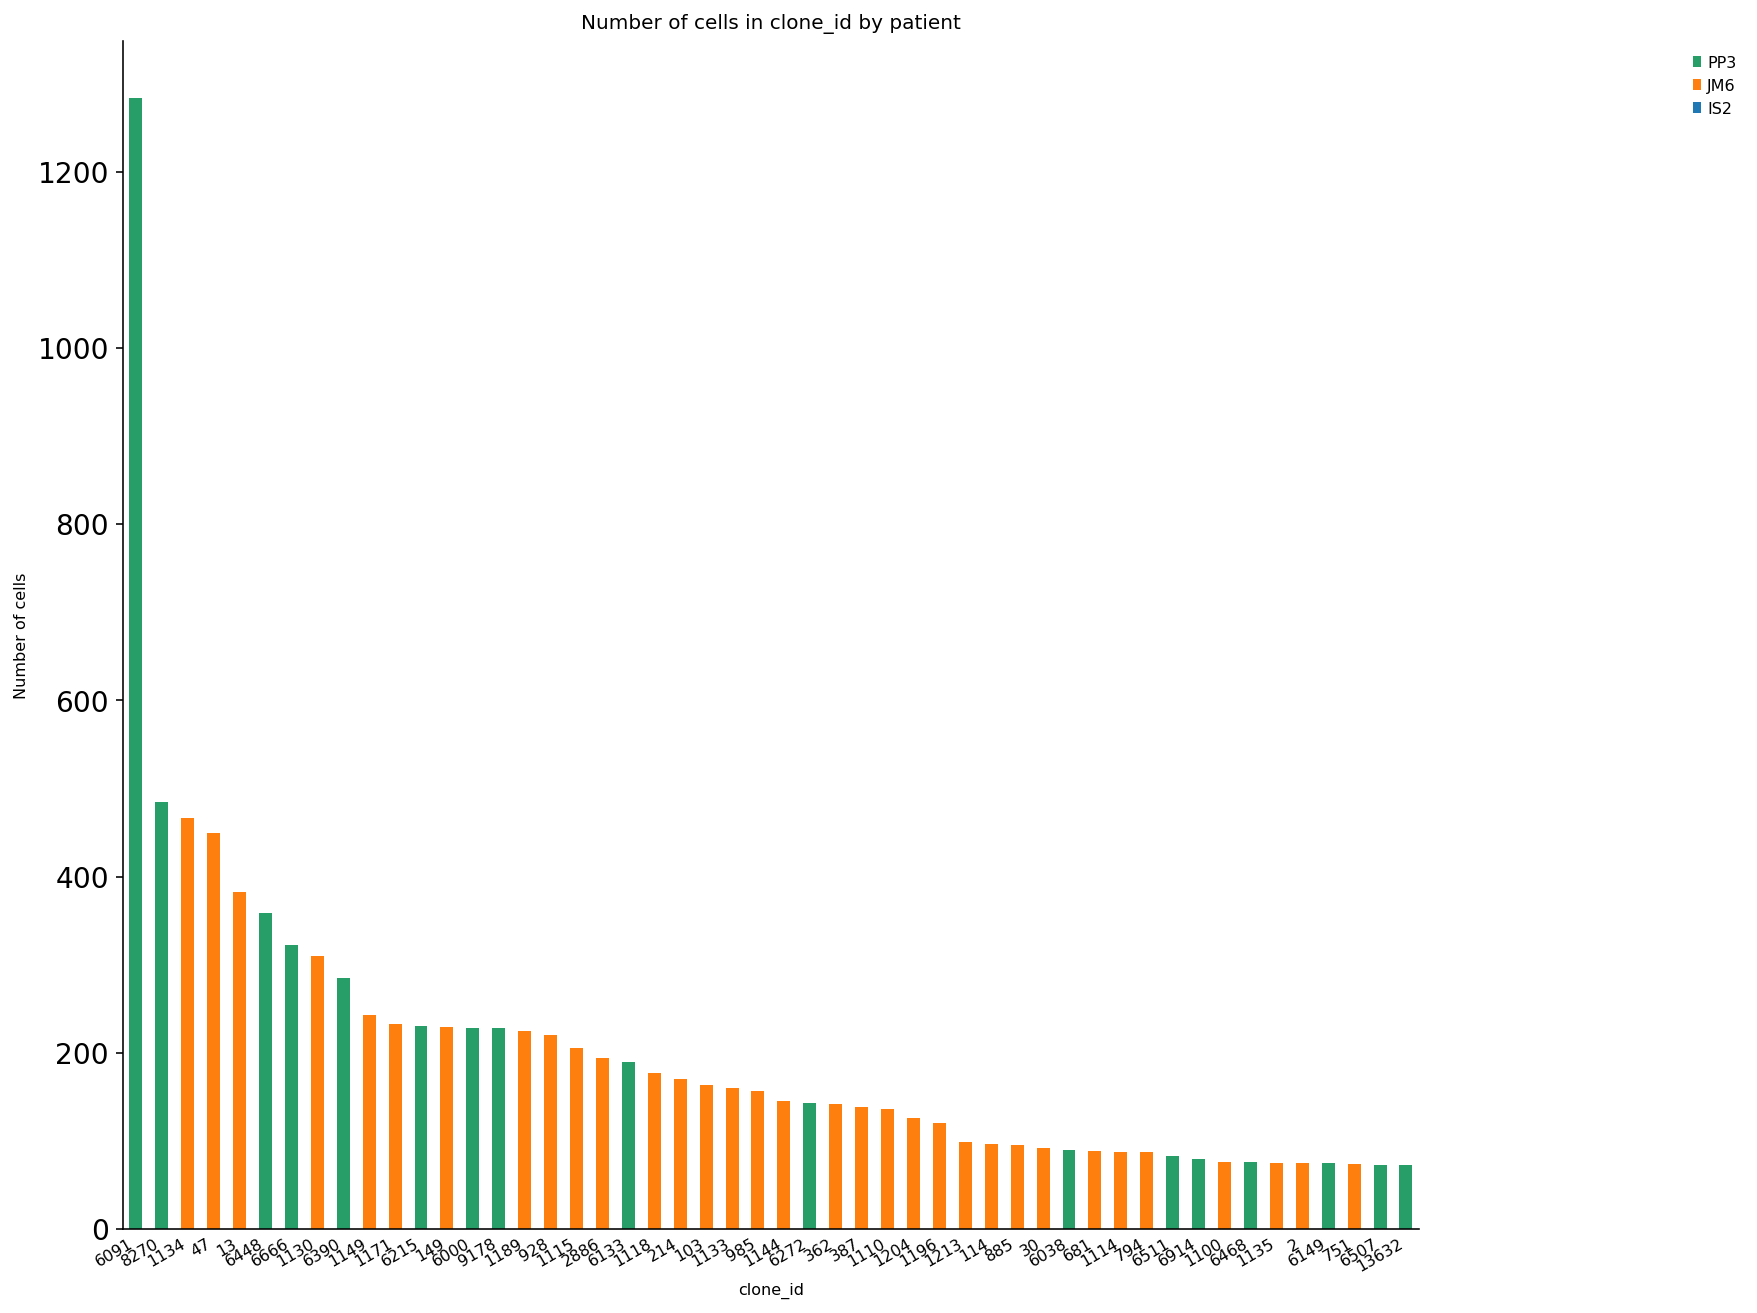

In [343]:
ir.pl.group_abundance(adata_filt, groupby="clone_id", target_col="patient", max_cols=50,fig_kws={'figsize':[15, 15]})

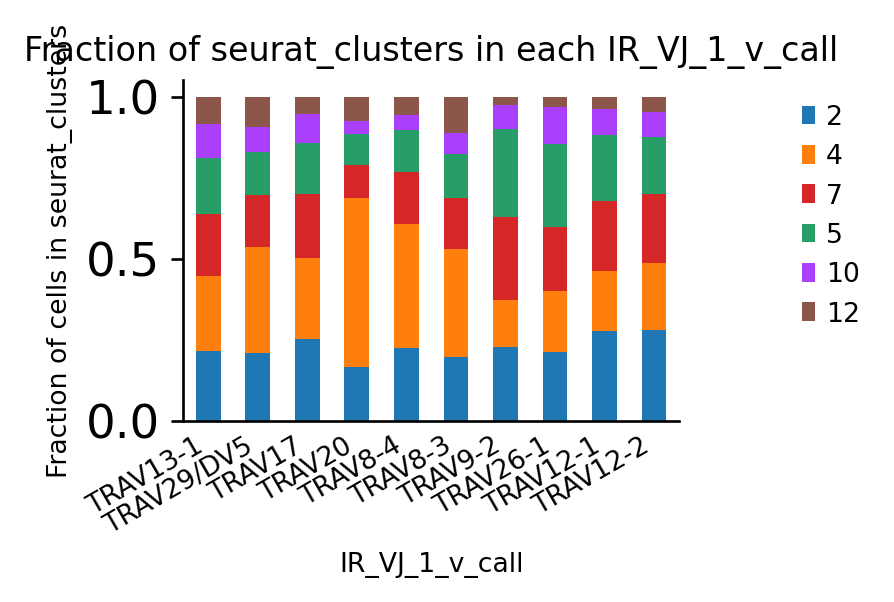

In [344]:
ax = ir.pl.group_abundance(
    adata_filt, groupby="IR_VJ_1_v_call", target_col="seurat_clusters", normalize=True, max_cols=10
)


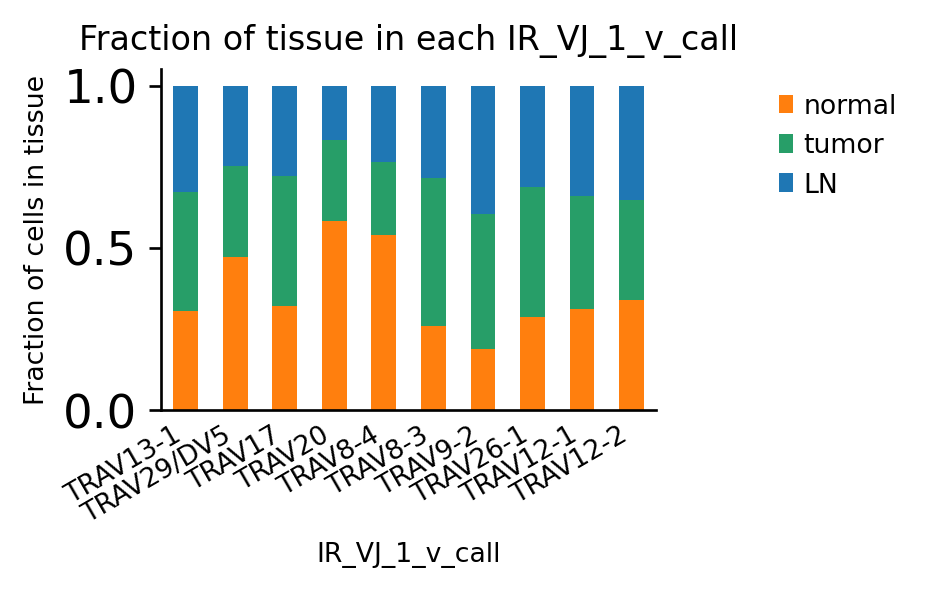

In [345]:
ax = ir.pl.group_abundance(
    adata_filt, groupby="IR_VJ_1_v_call", target_col="tissue", normalize=True, max_cols=10
)


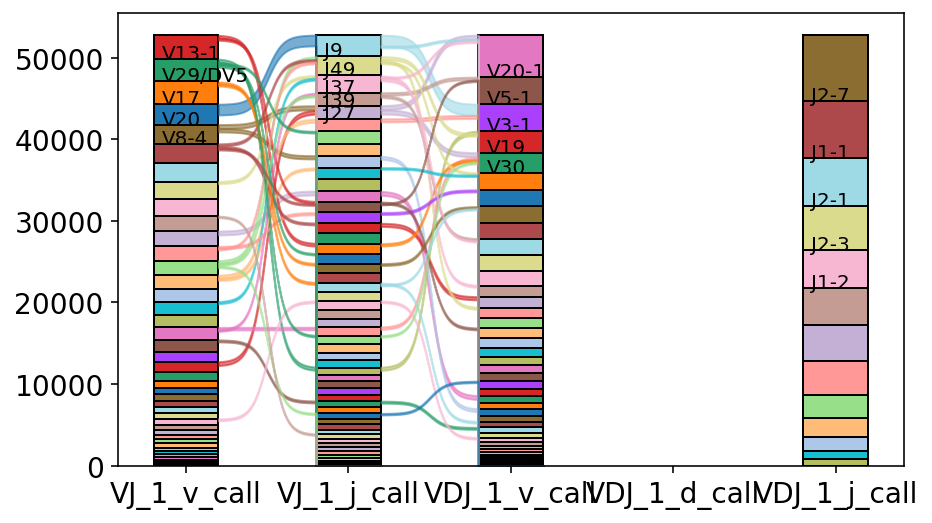

In [346]:
ax = ir.pl.vdj_usage(adata_filt, full_combination=False, max_segments=None, max_ribbons=30)

<AxesSubplot:title={'center':'Spectratype of IR_VJ_1_junction_aa by seurat_clusters'}, xlabel='IR_VJ_1_junction_aa length', ylabel='Number of cells'>

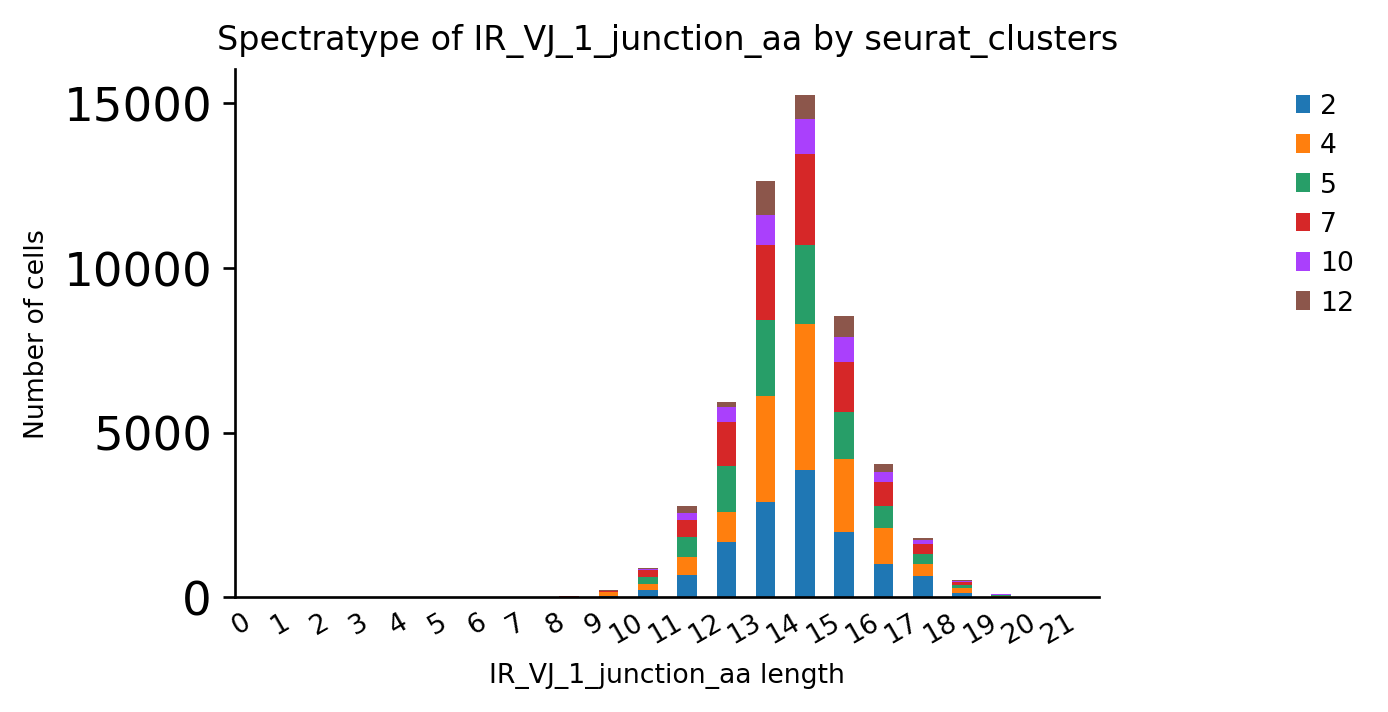

In [347]:
ir.pl.spectratype(adata_filt, color="seurat_clusters", viztype="bar", fig_kws={"dpi": 120})

<AxesSubplot:title={'center':'Spectratype of IR_VJ_1_junction_aa by tissue'}, xlabel='IR_VJ_1_junction_aa length', ylabel='Number of cells'>

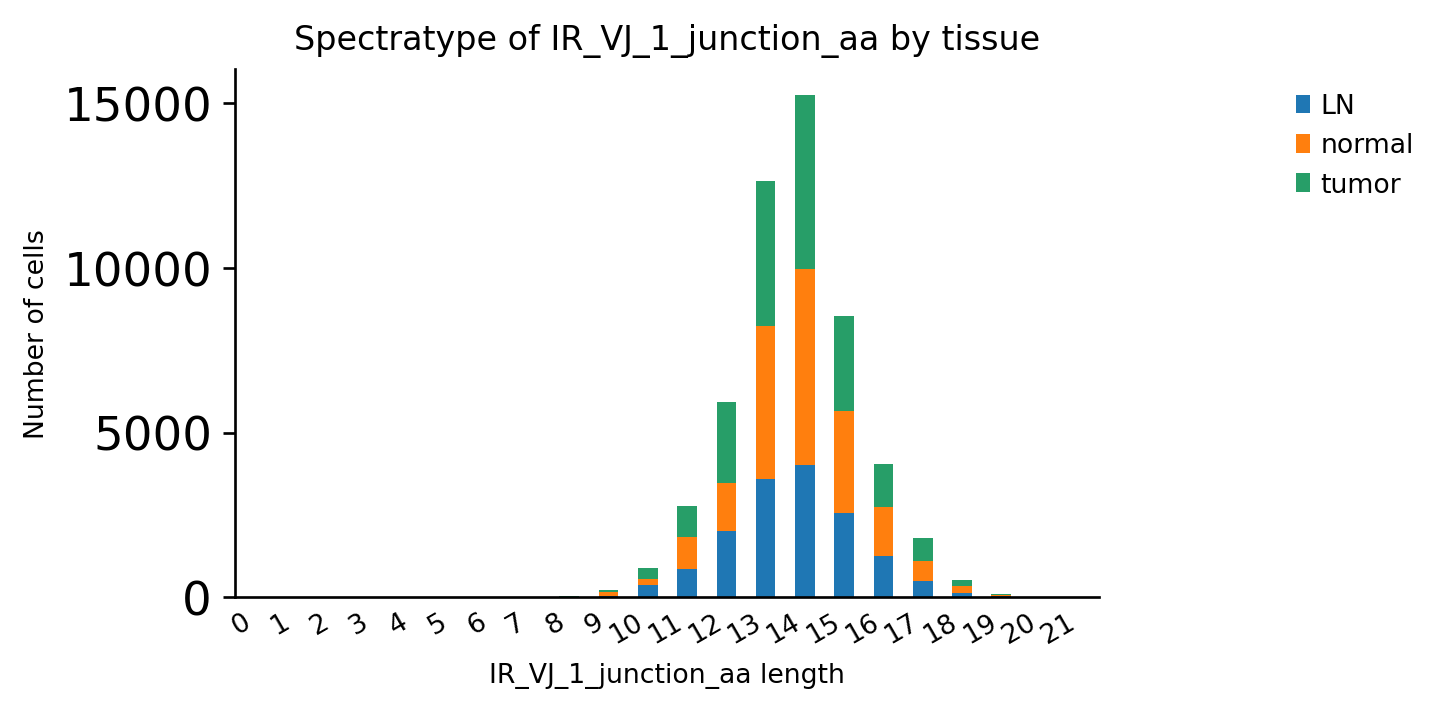

In [348]:
ir.pl.spectratype(adata_filt, color="tissue", viztype="bar", fig_kws={"dpi": 120})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:title={'center':'Repertoire overlap between LN and tumor'}, xlabel='Clonotype size in LN', ylabel='Clonotype size in tumor'>

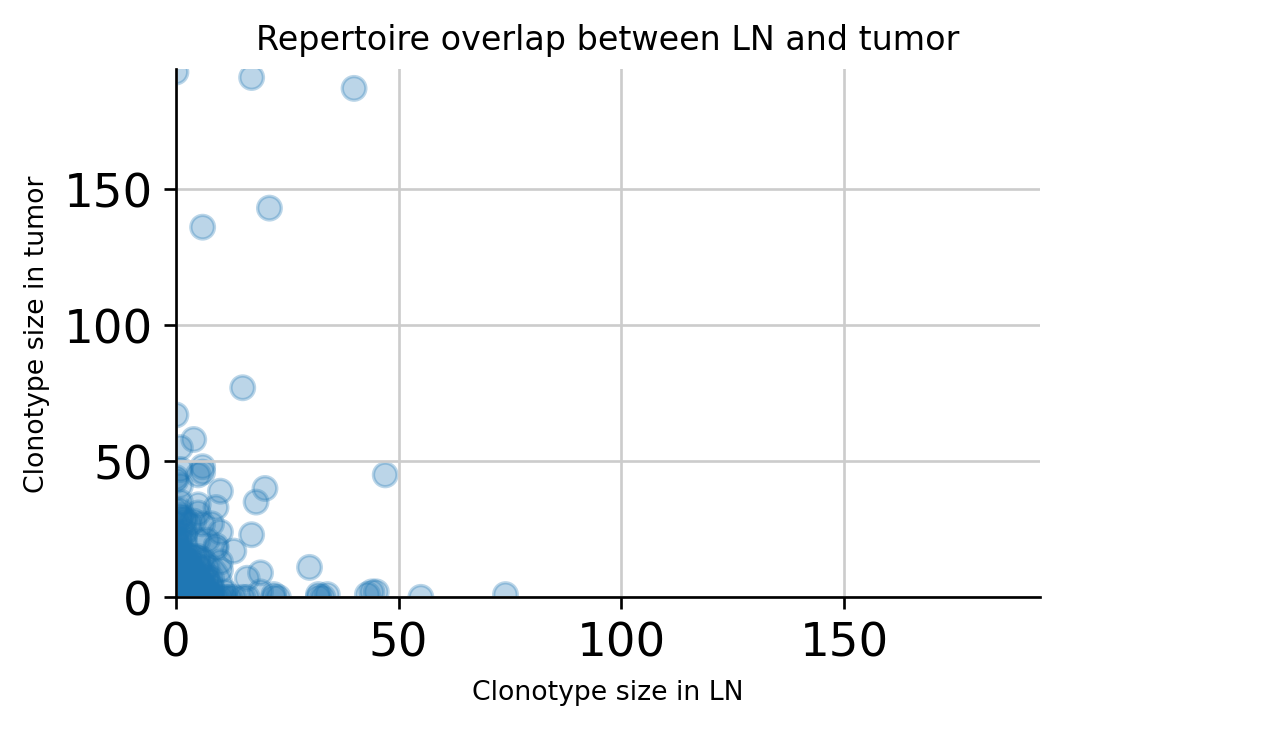

In [349]:
ir.pl.repertoire_overlap(
    adata_filt, "tissue", pair_to_plot=["LN", "tumor"], fig_kws={"dpi": 120}
)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:title={'center':'Repertoire overlap between LN and normal'}, xlabel='Clonotype size in LN', ylabel='Clonotype size in normal'>

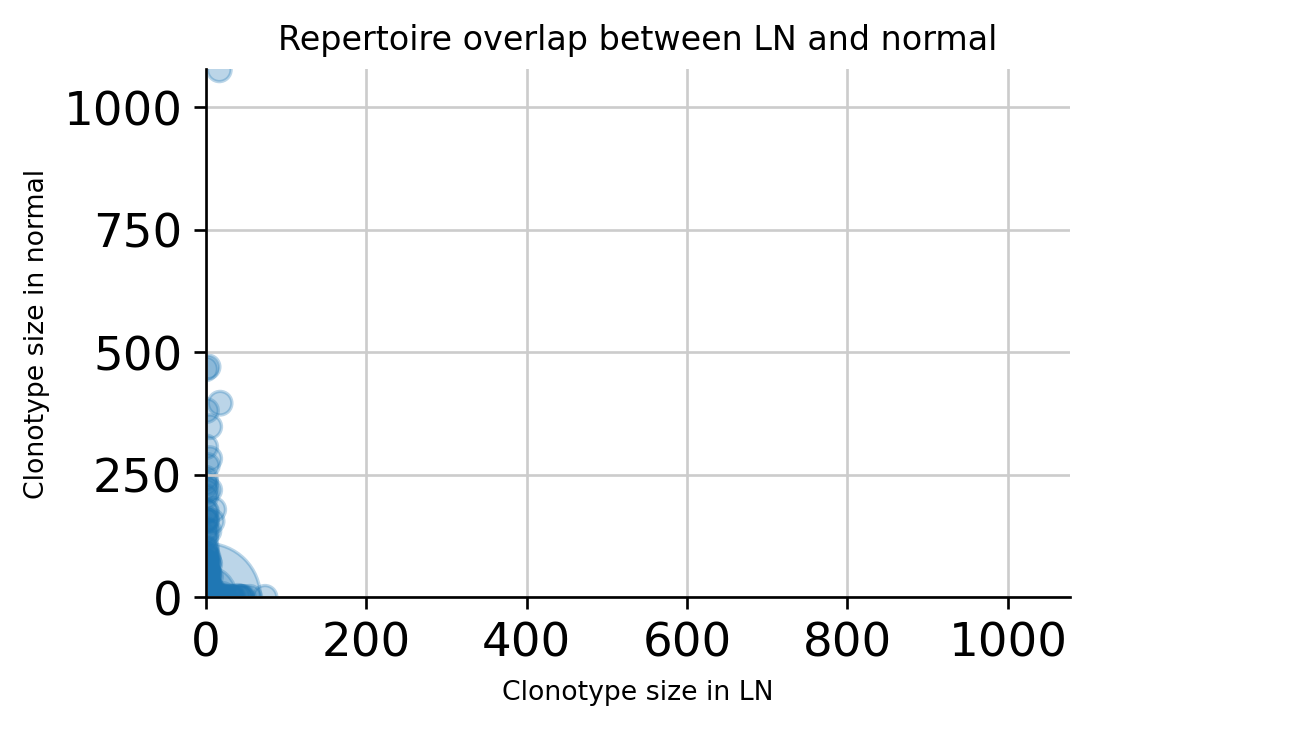

In [350]:
ir.pl.repertoire_overlap(
    adata_filt, "tissue", pair_to_plot=["LN", "normal"], fig_kws={"dpi": 120}
)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:title={'center':'Repertoire overlap between normal and tumor'}, xlabel='Clonotype size in normal', ylabel='Clonotype size in tumor'>

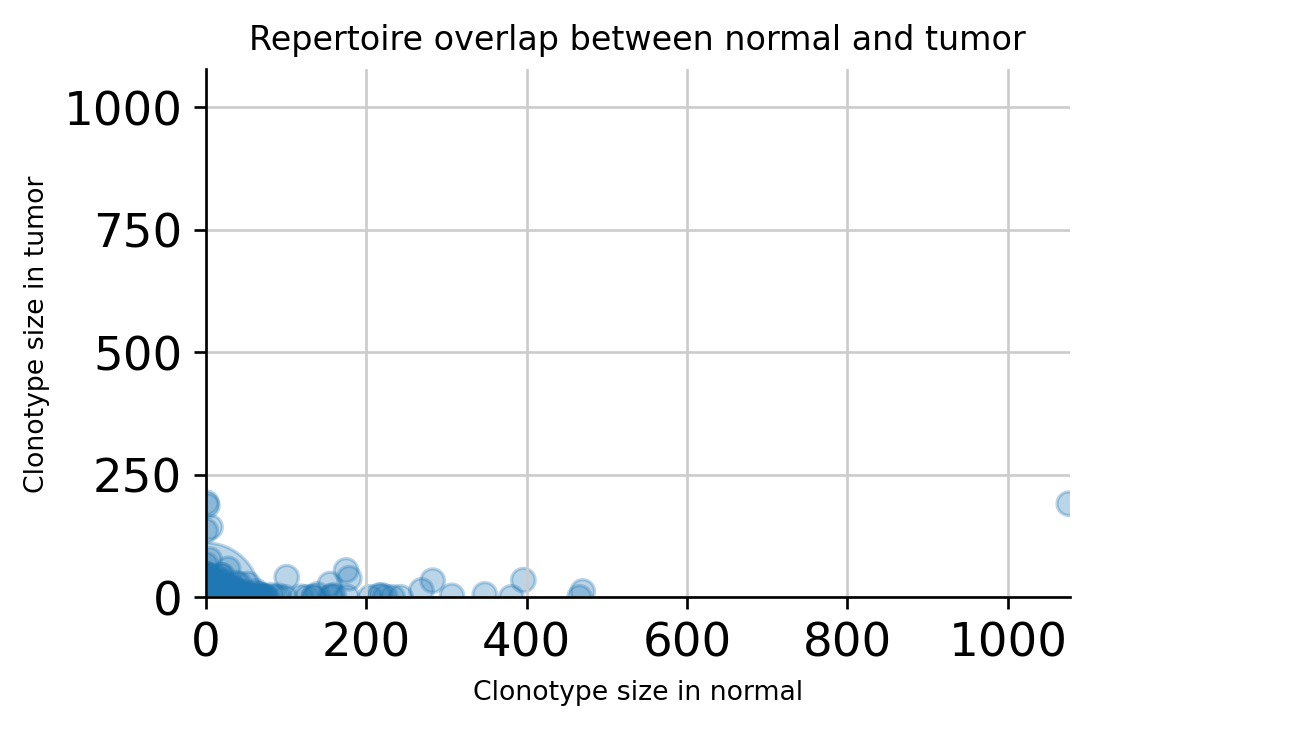

In [351]:
ir.pl.repertoire_overlap(
    adata_filt, "tissue", pair_to_plot=["normal", "tumor"], fig_kws={"dpi": 120}
)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:title={'center':'Repertoire overlap between LN and tumor'}, xlabel='Clonotype size in LN', ylabel='Clonotype size in tumor'>

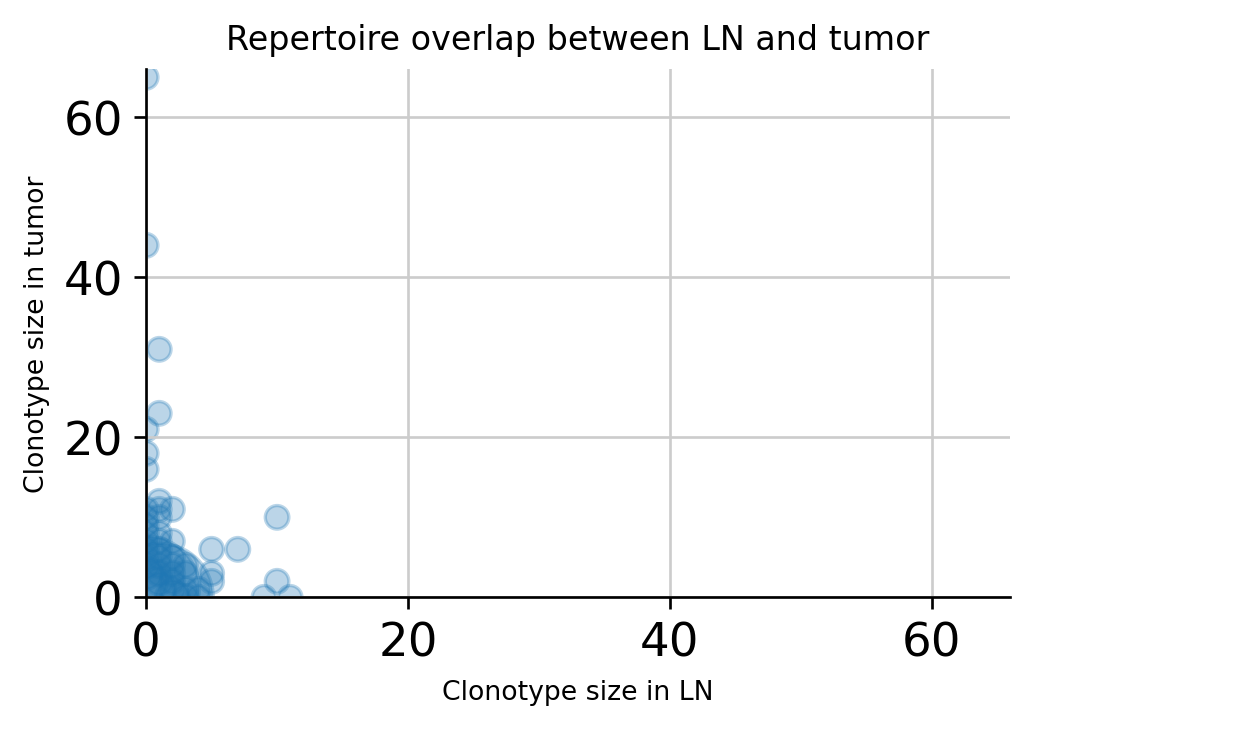

In [352]:
ir.pl.repertoire_overlap(
    adata_treg, "tissue", pair_to_plot=["LN", "tumor"], fig_kws={"dpi": 120}
)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:title={'center':'Repertoire overlap between LN and normal'}, xlabel='Clonotype size in LN', ylabel='Clonotype size in normal'>

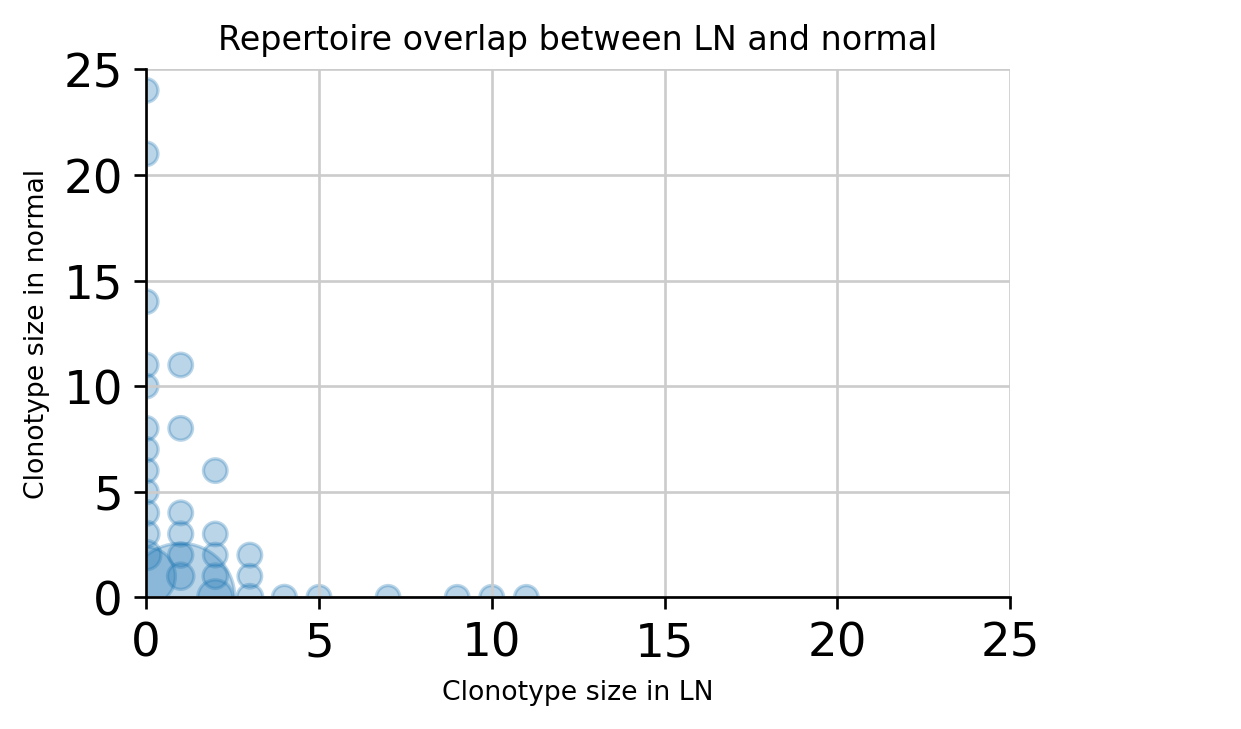

In [353]:
ir.pl.repertoire_overlap(
    adata_treg, "tissue", pair_to_plot=["LN", "normal"], fig_kws={"dpi": 120}
)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:title={'center':'Repertoire overlap between normal and tumor'}, xlabel='Clonotype size in normal', ylabel='Clonotype size in tumor'>

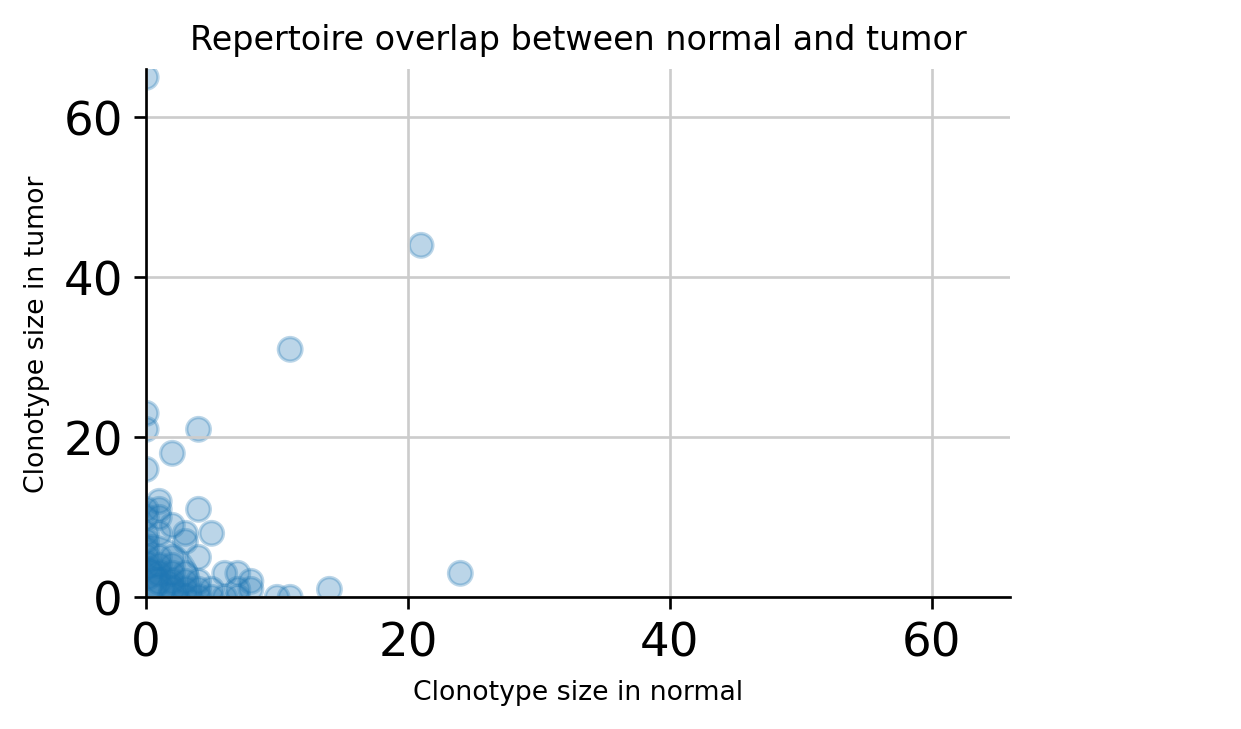

In [354]:
ir.pl.repertoire_overlap(
    adata_treg, "tissue", pair_to_plot=["normal", "tumor"], fig_kws={"dpi": 120}
)


In [286]:
adata.write("/home/lugli/spuccio/Projects/SP035_TregIntegration/Hopkins/adata_filt_.h5ad")


In [356]:
#adata_treg.write("/home/lugli/spuccio/Projects/SP035_TregIntegration/Hopkins/adata_treg.h5ad")

In [379]:
ir.io.write_airr(adata_treg,"/home/lugli/spuccio/Projects/SP035_TregIntegration/Hopkins/adata_filt_.airr")

In [391]:
pd.DataFrame(adata_treg.obs).to_csv("/home/lugli/spuccio/Projects/SP035_TregIntegration/Hopkins/adata_filt_.tsv",sep="\t",
                                   header=True,index=True)

In [395]:
pd.Series(adata_treg.uns['repertoire_overlap'])

weighted    clone_id    0    1    2    3    4    5    6   ...
distance    [0.9819979716024341, 0.9551825293350718, 0.955...
linkage     [[1.0, 2.0, 0.9550920245398773, 2.0], [0.0, 3....
dtype: object

In [399]:
df = adata_treg.uns['repertoire_overlap']['weighted']

In [406]:
df.shape

(3, 6851)

In [407]:
LN_unique = df.T.loc[(df.T['LN'] != 0) & (df.T['normal'] == 0) & (df.T['tumor'] == 0) ]

In [408]:
Normal_unique = df.T.loc[(df.T['LN'] == 0) & (df.T['normal'] != 0) & (df.T['tumor'] == 0) ]

In [409]:
Tumor_unique = df.T.loc[(df.T['LN'] == 0) & (df.T['normal'] == 0) & (df.T['tumor'] != 0) ]

In [410]:
LN_unique.shape

(2776, 3)

In [411]:
Normal_unique.shape

(715, 3)

In [412]:
Tumor_unique.shape

(2907, 3)

In [413]:
Common_tre = df.T.loc[(df.T['LN'] != 0) & (df.T['normal'] != 0) & (df.T['tumor'] != 0) ]

In [414]:
Common_tre.shape

(38, 3)

In [415]:
Common_LN_tumor = df.T.loc[(df.T['LN'] != 0) & (df.T['normal'] == 0) & (df.T['tumor'] != 0) ]

In [420]:
Common_LN_tumor.shape

(237, 3)

In [416]:
Common_LN_tumor.shape

(237, 3)

In [417]:
Common_LN_normal = df.T.loc[(df.T['LN'] != 0) & (df.T['normal'] != 0) & (df.T['tumor'] == 0) ]

In [422]:
Common_LN_normal.shape

(33, 3)

In [419]:
Common_normal_tumor = df.T.loc[(df.T['LN'] == 0) & (df.T['normal'] != 0) & (df.T['tumor'] != 0) ]

In [423]:
Common_normal_tumor.shape

(145, 3)

In [ ]:
2776:6851=x:100

In [424]:
2776*100/6851

40.51963217048606

In [431]:
2907*100/6851

42.4317617866005